<span style="font-family: monospace">

<H2>Business Problem</H2>

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

1. Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
2. For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.


<H2>Product Portfolio</H2>

1. The KP281 is an entry-level treadmill that sells for $1,500.

2. The KP481 is for mid-level runners that sell for $1,750.

3. The KP781 treadmill is having advanced features that sell for $2,500.

<H2>What good looks like?</H2>

1. Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset
2. Detect Outliers (using boxplot, “describe” method by checking the difference between mean and median)
3. Check if features like marital status, age have any effect on the product purchased (using countplot, histplots, boxplots etc)
4. Representing the marginal probability like - what percent of customers have purchased KP281, KP481, or KP781 in a table (can use pandas.crosstab here)
5. Check correlation among different factors using heat maps or pair plots.
6. With all the above steps you can answer questions like: What is the probability of a male customer buying a KP781 treadmill?
7. Customer Profiling - Categorization of users.
8. Probability- marginal, conditional probability.
9. Some recommendations and actionable insights, based on the inferences.

<H2>Evaluation Criteria</H2>

1. Defining Problem Statement and Analysing basic metrics (10 Points)
    - Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary
2. Non-Graphical Analysis: Value counts and unique attributes ​​(10 Points)
3. Visual Analysis - Univariate & Bivariate (30 Points)
    - For continuous variable(s): Distplot, countplot, histogram for univariate analysis (10 Points)
    - For categorical variable(s): Boxplot (10 Points)
    - For correlation: Heatmaps, Pairplots(10 Points)
4. Missing Value & Outlier Detection (10 Points)
5. Business Insights based on Non-Graphical and Visual Analysis (10 Points)
    - Comments on the range of attributes
    - Comments on the distribution of the variables and relationship between them
    - Comments for each univariate and bivariate plot
6. Recommendations (10 Points) - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand
</span>

In [1]:
import math, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
pd.set_option('expand_frame_repr', False)

In [2]:
df = pd.read_csv('aerofit.csv')
print(df.head())

  Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   KP281   18    Male         14        Single      3        4   29562    112
1   KP281   19    Male         15        Single      2        3   31836     75
2   KP281   19  Female         14     Partnered      4        3   30699     66
3   KP281   19    Male         12        Single      3        3   32973     85
4   KP281   20    Male         13     Partnered      4        2   35247     47


In [3]:
print(df.shape)

(180, 9)


In [4]:
print(df.isna().sum())

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64


In [5]:
print(df.dtypes)

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object


In [6]:
for col in ['Usage', 'Education', 'Fitness']:
    df[col] = df[col].astype('object')

In [7]:
print(df.describe())

              Age         Income       Miles
count  180.000000     180.000000  180.000000
mean    28.788889   53719.577778  103.194444
std      6.943498   16506.684226   51.863605
min     18.000000   29562.000000   21.000000
25%     24.000000   44058.750000   66.000000
50%     26.000000   50596.500000   94.000000
75%     33.000000   58668.000000  114.750000
max     50.000000  104581.000000  360.000000


In [8]:
print(df.describe(include=object))

       Product Gender  Education MaritalStatus  Usage  Fitness
count      180    180        180           180    180      180
unique       3      2          8             2      6        5
top      KP281   Male         16     Partnered      3        3
freq        80    104         85           107     69       97


In [9]:
print(df['Product'].value_counts())

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64


In [10]:
print(df['Gender'].value_counts())

Male      104
Female     76
Name: Gender, dtype: int64


In [11]:
print(df['MaritalStatus'].value_counts())

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64


In [12]:
print(df['Fitness'].value_counts())

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64


In [13]:
print(df['Education'].value_counts())

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64


In [14]:
print(df['Usage'].value_counts())

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64


In [15]:
# forming separate product wise dataframes
df_kp281 = df[df['Product'] == 'KP281'].reset_index(drop=True)
df_kp481 = df[df['Product'] == 'KP481'].reset_index(drop=True)
df_kp781 = df[df['Product'] == 'KP781'].reset_index(drop=True)
# fetching all the int and object column names in the following two variables
int_col_list = df.select_dtypes(int).columns.to_list()
object_col_list = df.select_dtypes(object).columns.to_list()
object_col_list.remove('Product')

In [16]:
fig_dict = {'fontname': 'monospace'}
fig_num = 0
def plot_histogram(data, title, fig_num, prod_type):
    plt.figure(figsize=(20, 5))
    sns.despine()
    sns.set_style('white')
    sns.set_context("paper")
    sns.histplot(data, kde=True)
    plt.title(f"Figure {fig_num}: Distribution of {title} for product type = {prod_type}", **fig_dict)
    plt.xticks(**fig_dict)
    plt.xlabel(title, **fig_dict)
    plt.yticks(**fig_dict)
    plt.ylabel("#Occurrences", **fig_dict)
    plt.show()

def plot_boxplot(data, title,  fig_num, prod_type):
    plt.figure(figsize=(20, 5))
    sns.despine()
    sns.set_style('white')
    sns.set_context("paper")
    sns.boxplot(data, orient='h')
    plt.title(f"Figure {fig_num}: Analysis of {title} for product type = {prod_type}", **fig_dict)
    plt.xticks(**fig_dict)
    plt.yticks([0], [''], **fig_dict)
    plt.ylabel(title, **fig_dict)
    plt.show()
    
def plot_countplot(data, title, fig_num, prod_type):
    plt.figure(figsize=(20, 5))
    sns.despine()
    sns.set_style('white')
    sns.set_context("paper")
    sns.countplot(x=data)
    plt.title(f"Figure {fig_num}: Categorical Distribution of {title} for product type = {prod_type}", **fig_dict)
    plt.xticks(**fig_dict)
    plt.xlabel(title, **fig_dict)
    plt.yticks(**fig_dict)
    plt.ylabel("#Occurrences", **fig_dict)
    plt.show()

def print_heatmap(data, fig_num, prod_type):
    plt.figure(figsize=(22, 5))
    sns.despine()
    sns.set_style('white')
    sns.set_context("paper")
    sns.heatmap(data)
    plt.title(f"Figure {fig_num}: Correlation Matrix for product type = {prod_type}", **fig_dict)
    plt.xticks(**fig_dict)
    plt.yticks(**fig_dict)
    plt.show()

def plot_scatterplot(x, y, fig_num, xname, yname, prod_type):
    plt.figure(figsize=(20, 5))
    sns.despine()
    sns.set_style('white')
    sns.set_context("paper")
    sns.scatterplot(x=x, y=y)
    plt.title(f"Figure {fig_num}: {xname} vs {yname} for product type = {prod_type}", **fig_dict)
    plt.xticks(**fig_dict)
    plt.yticks(**fig_dict)
    plt.show()

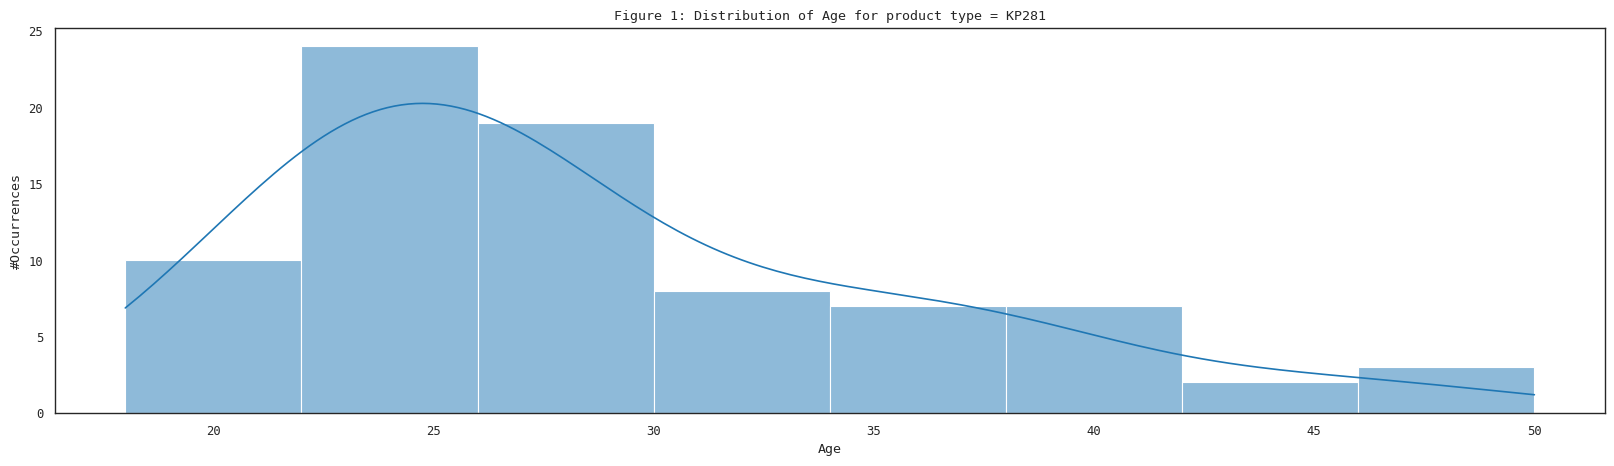

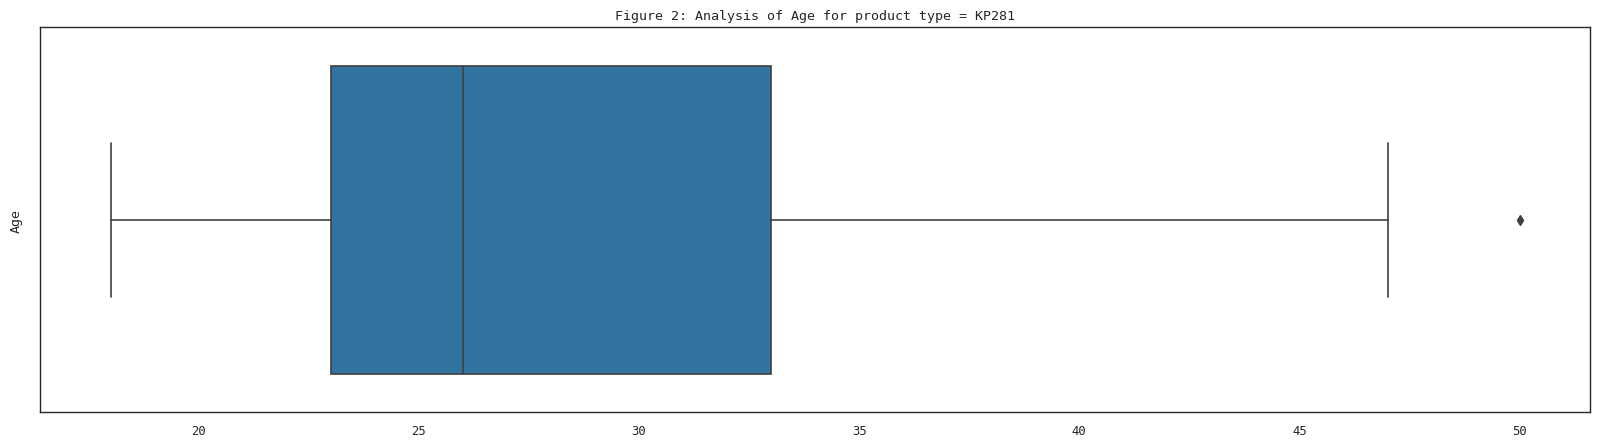

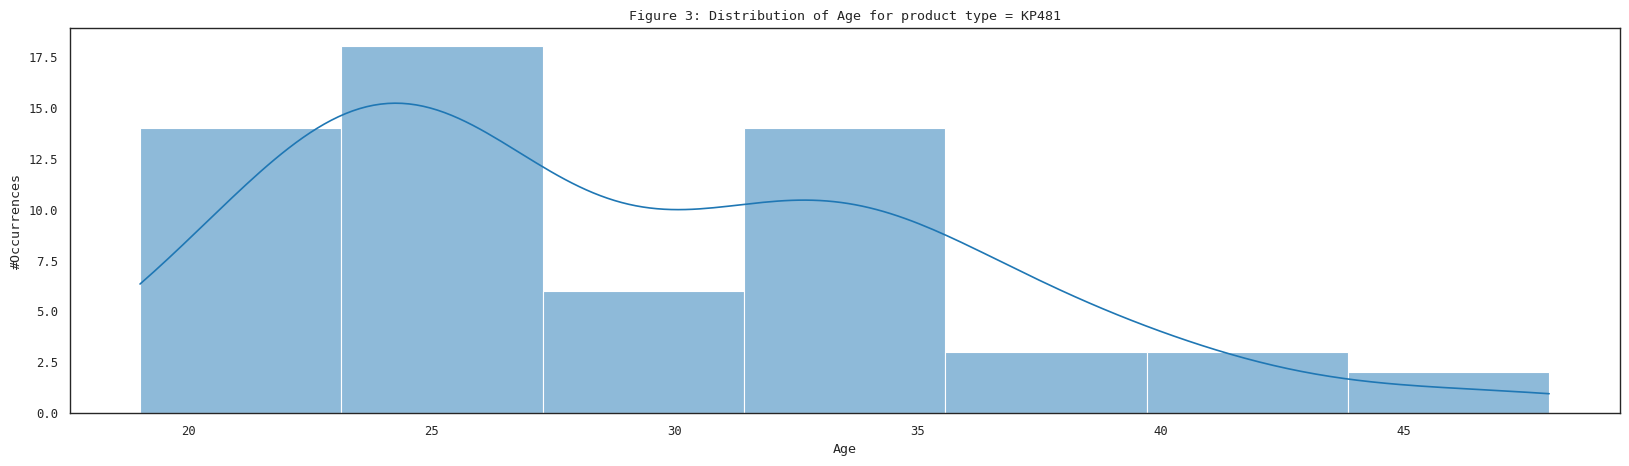

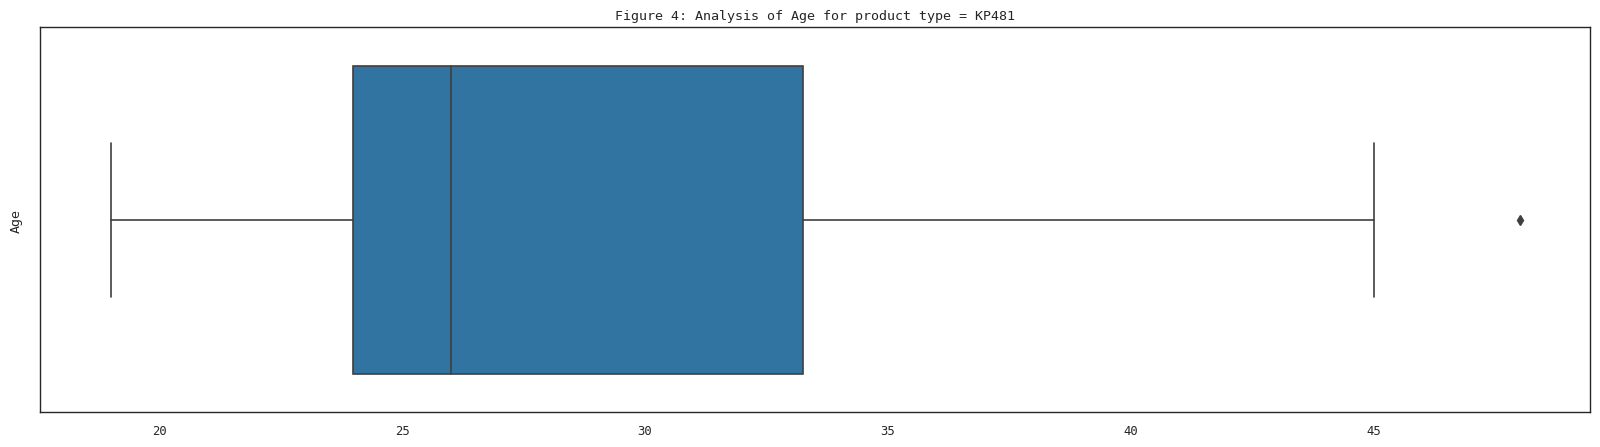

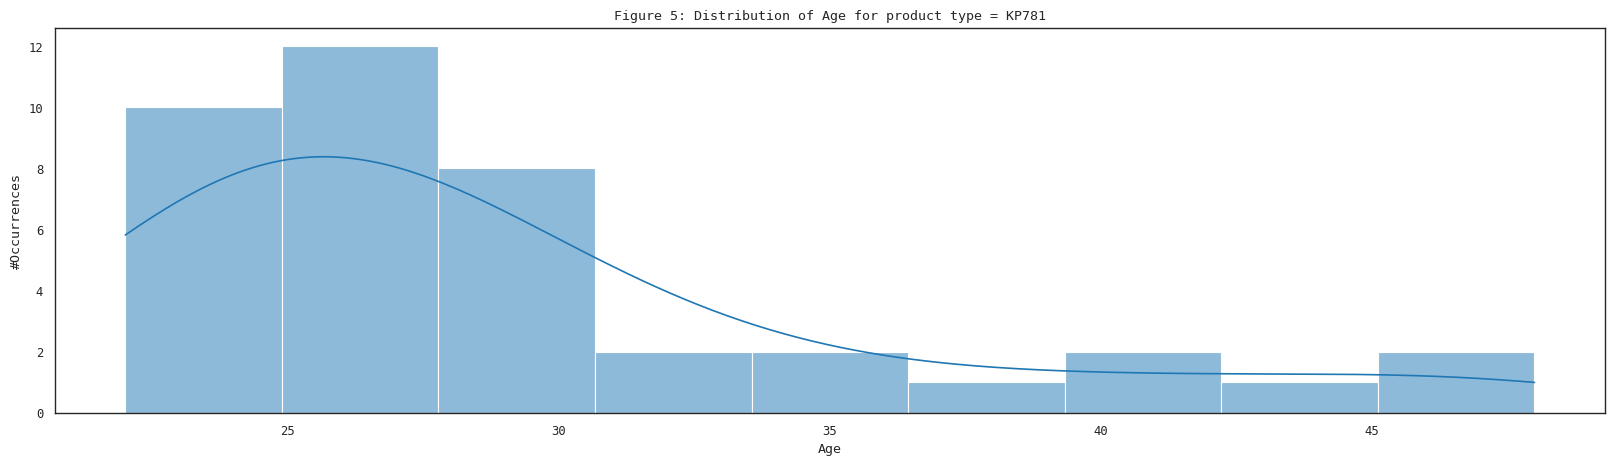

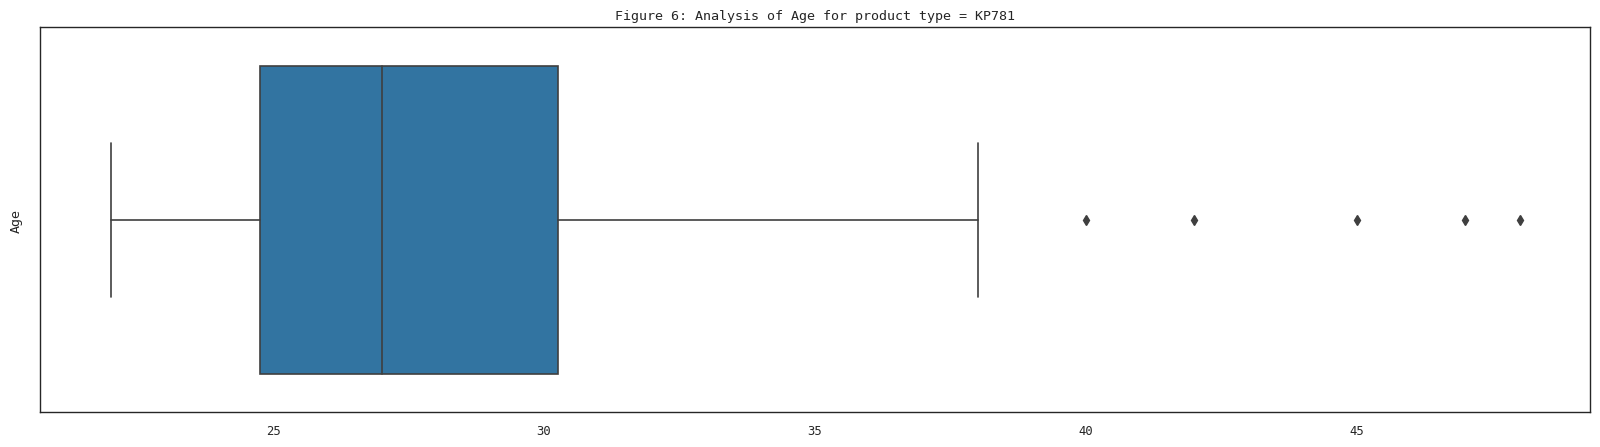

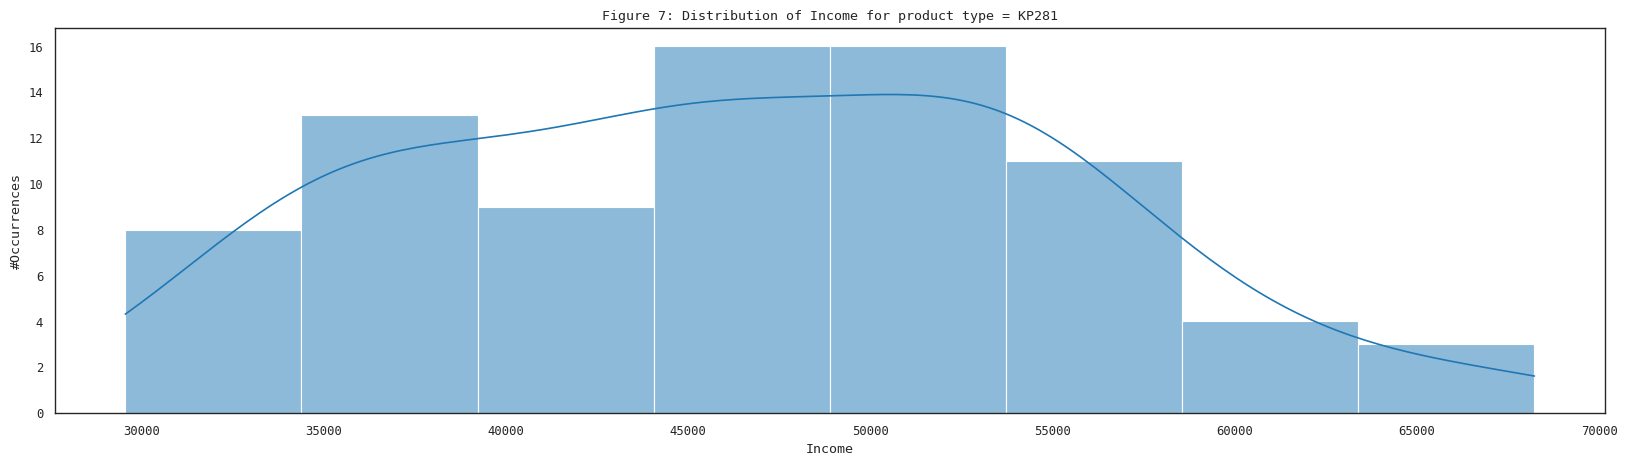

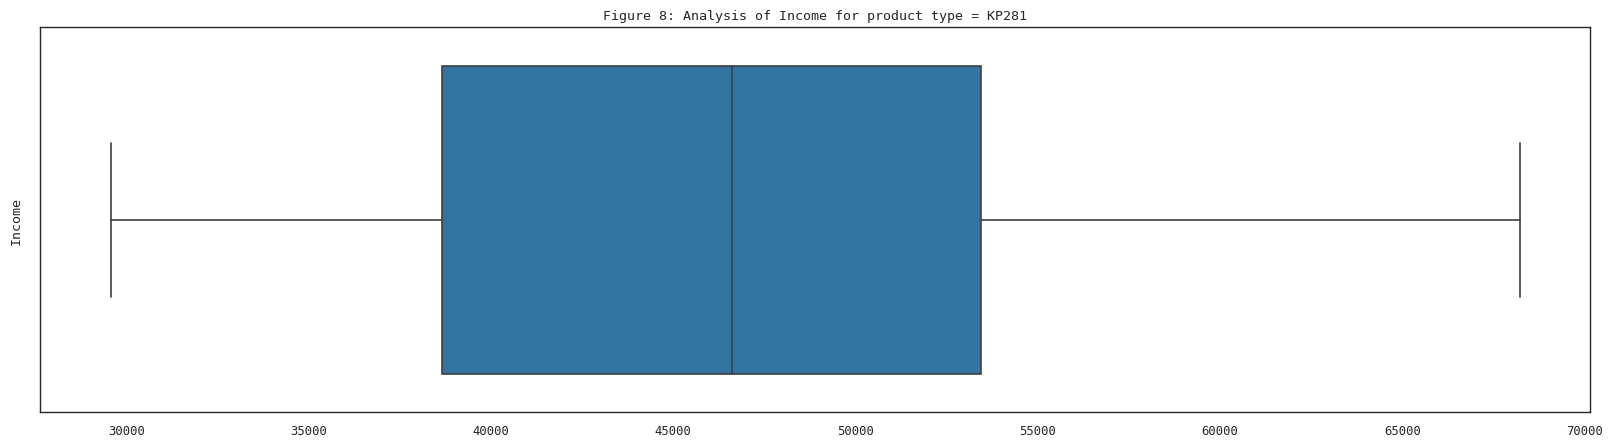

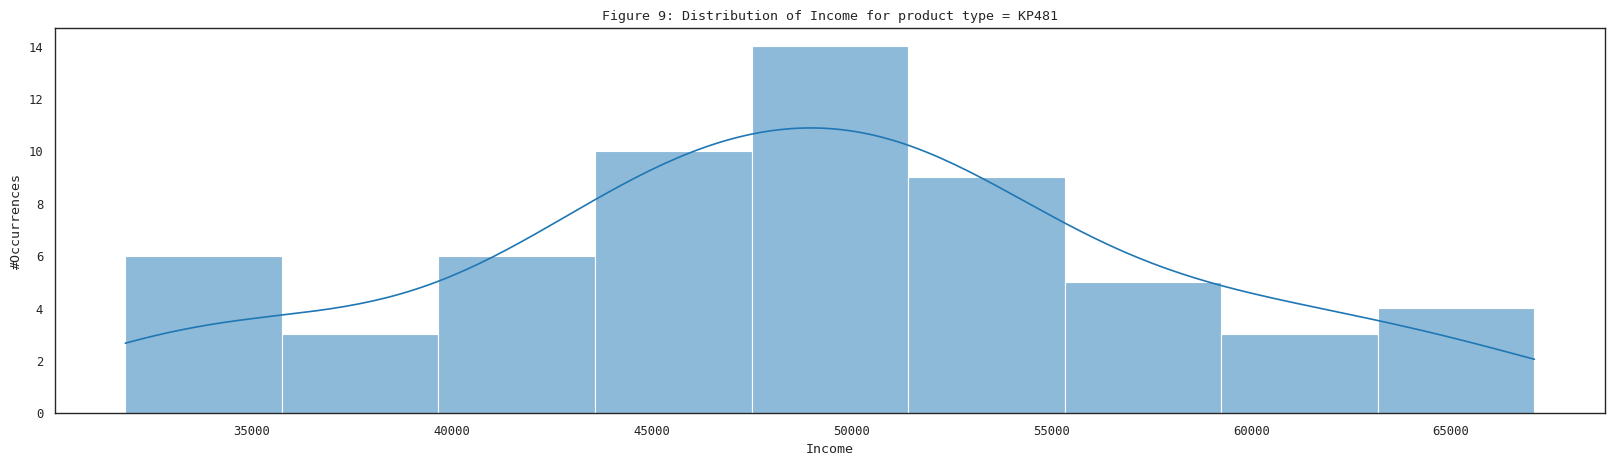

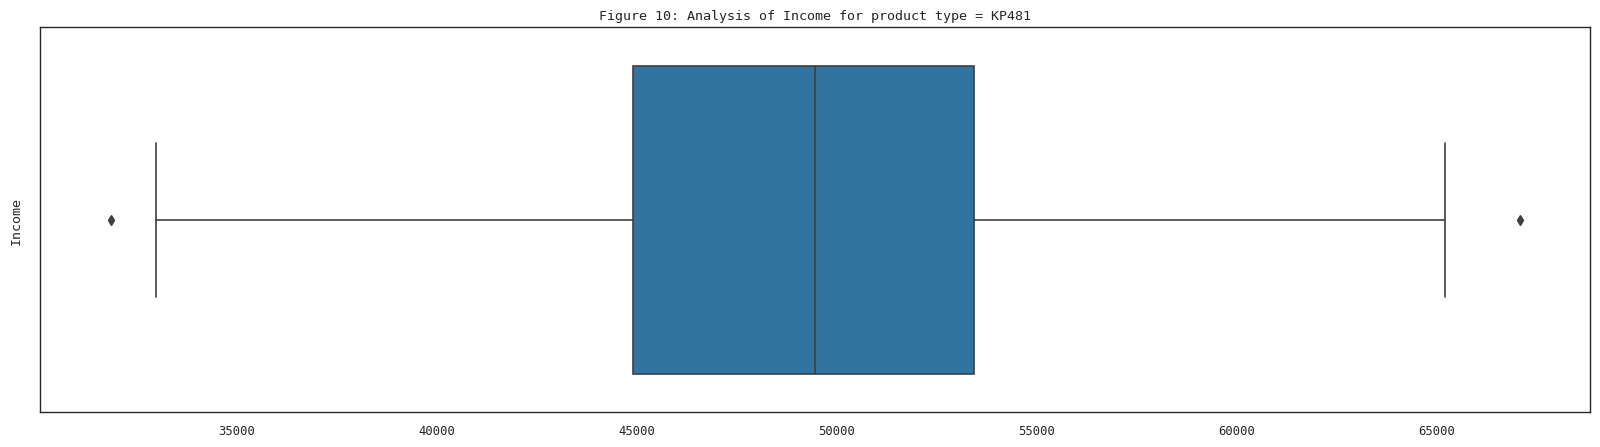

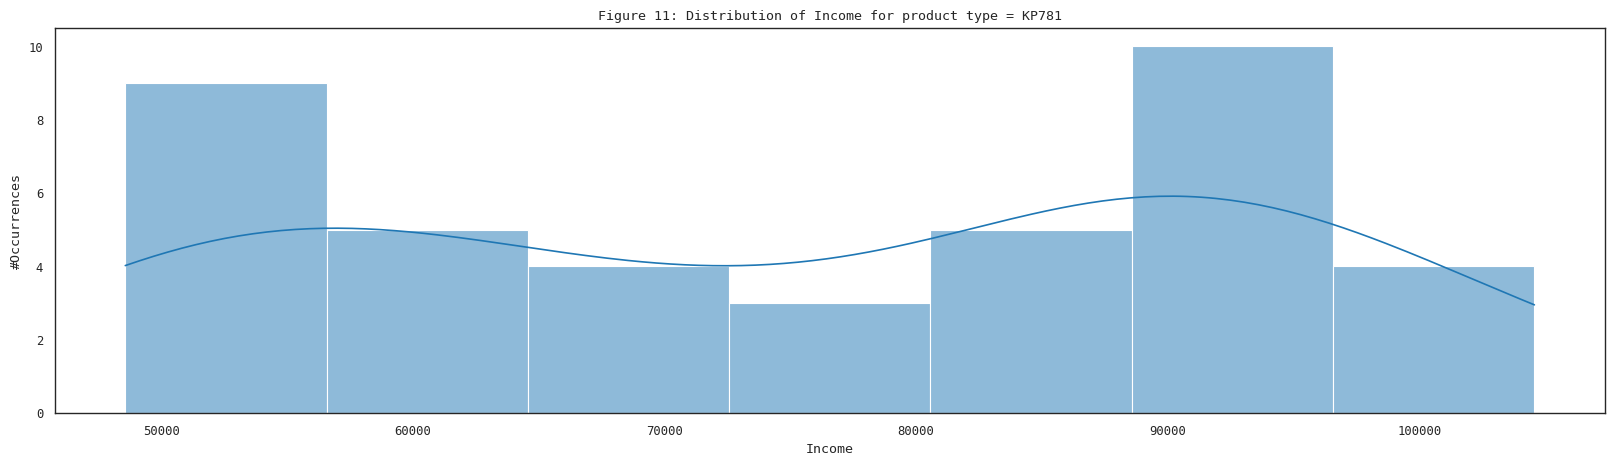

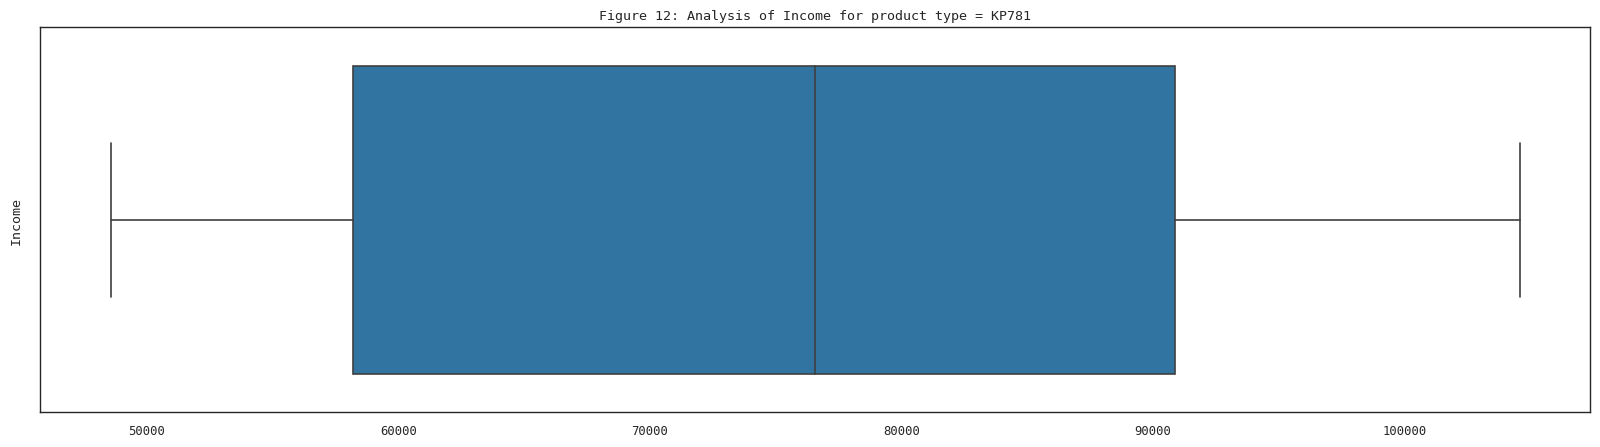

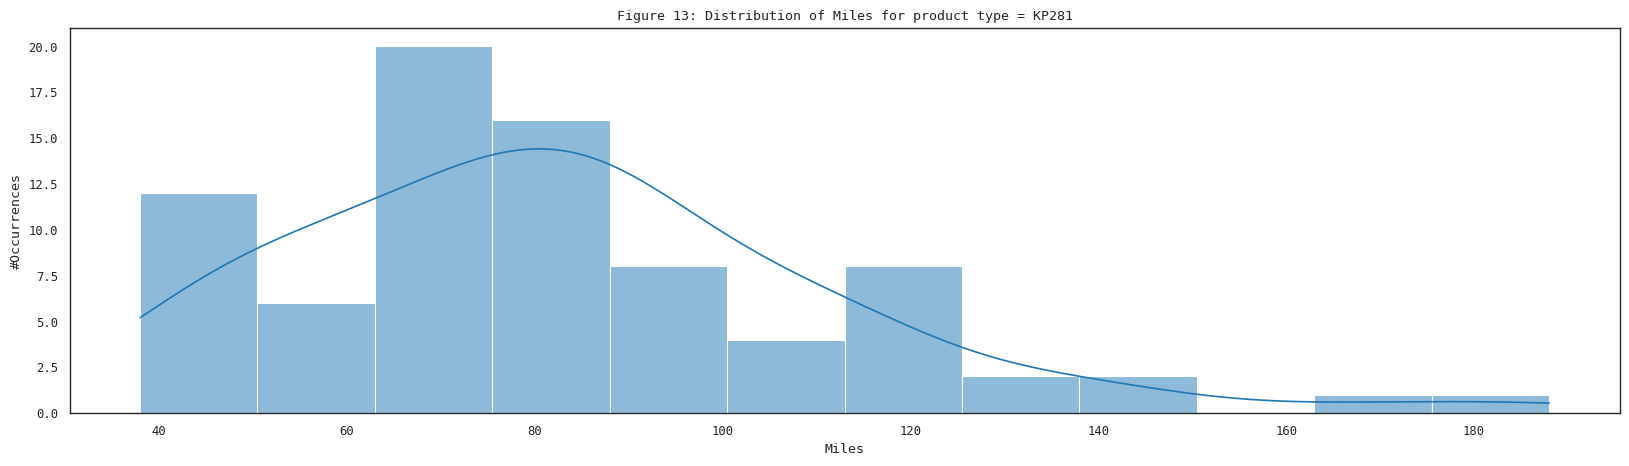

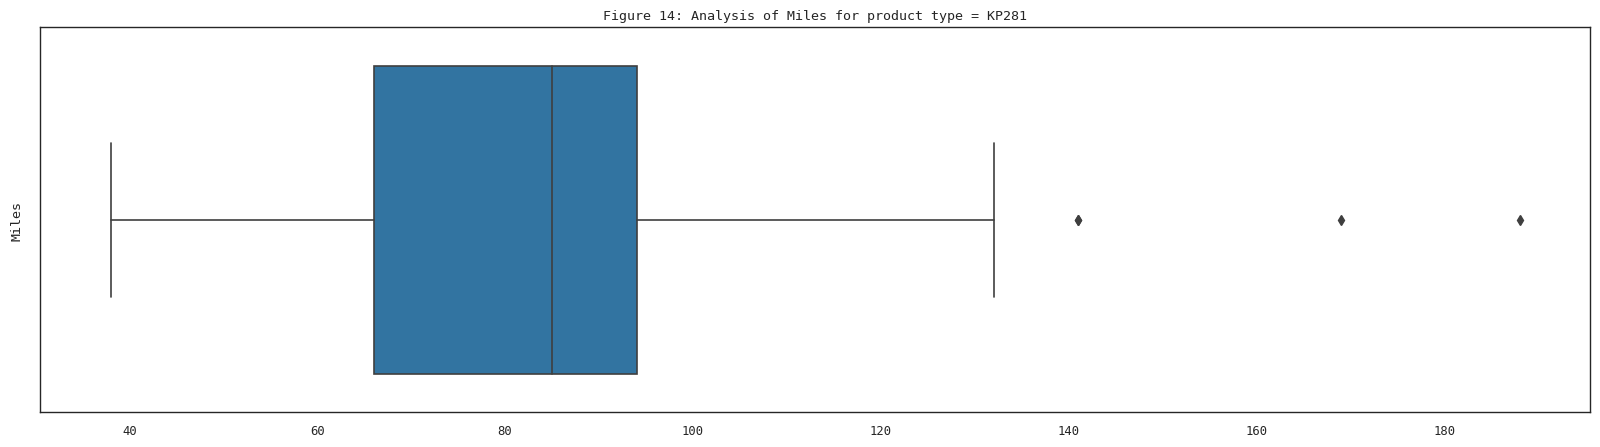

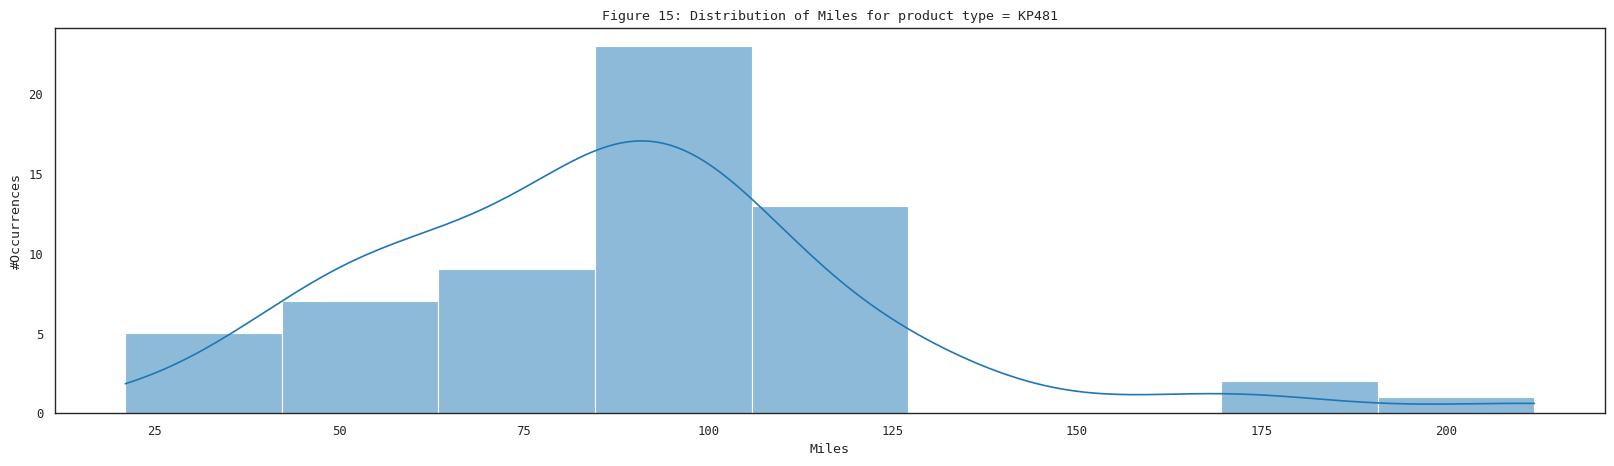

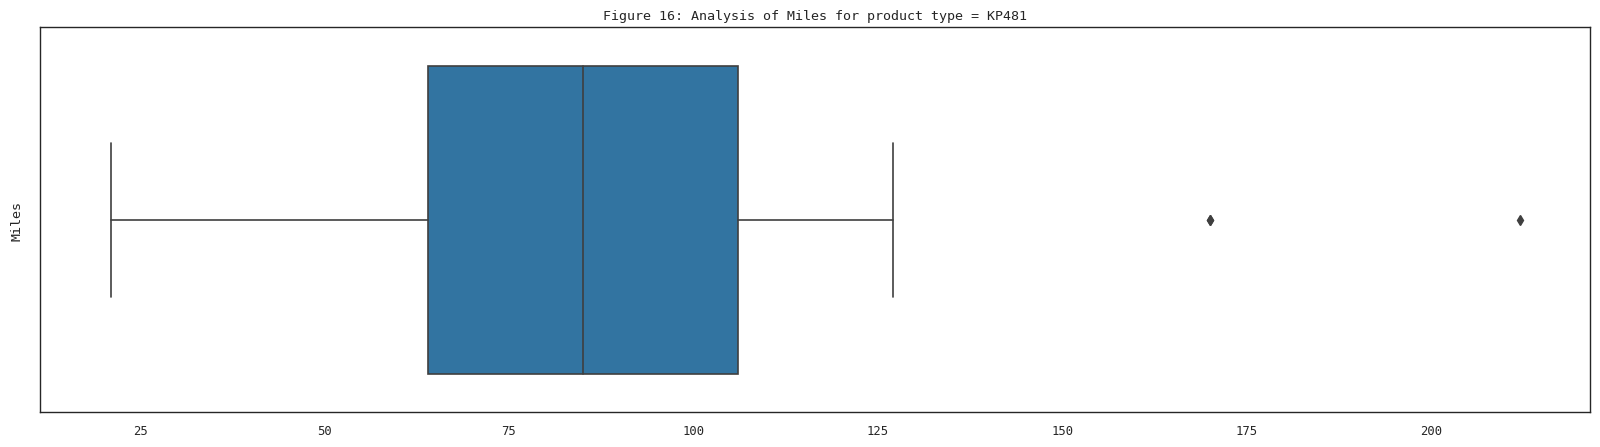

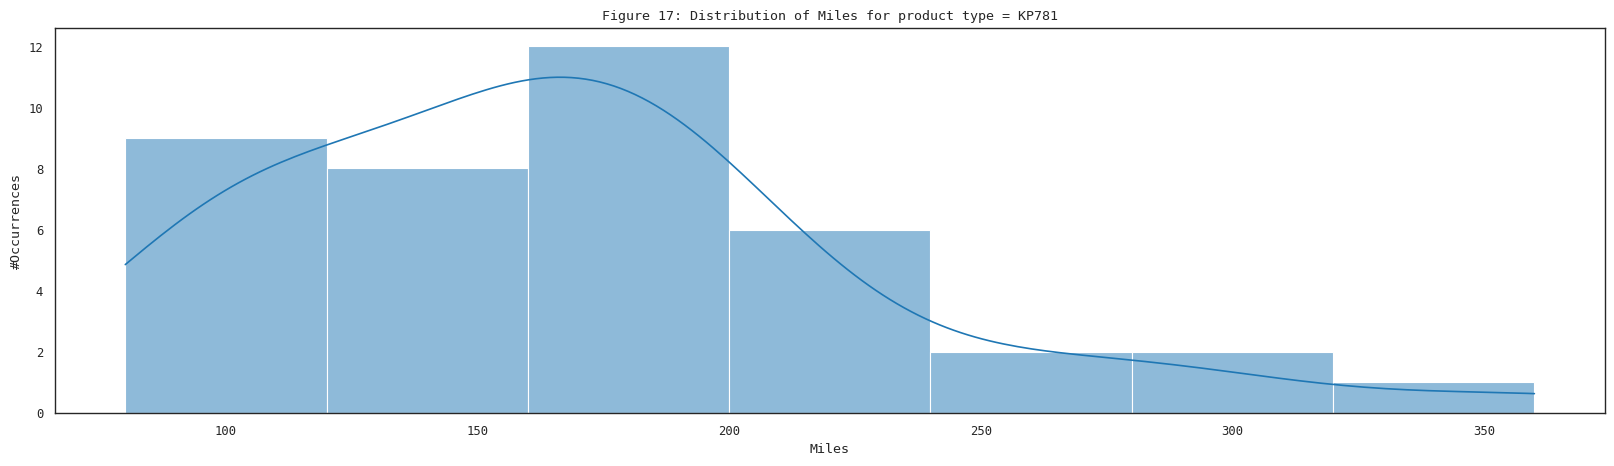

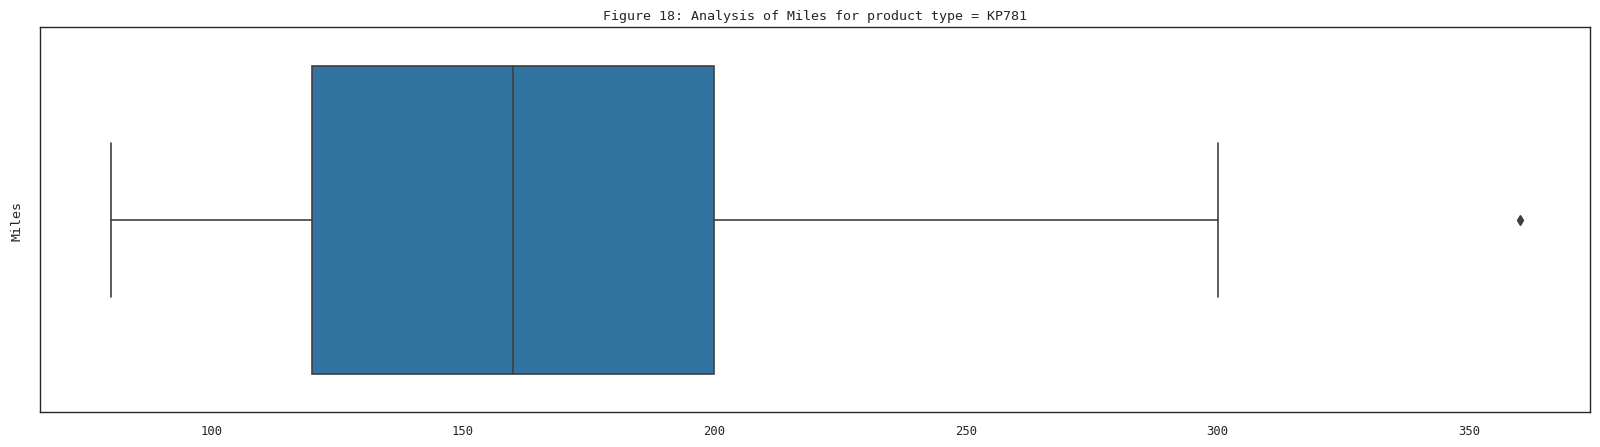

In [17]:
for col in int_col_list:
    fig_num += 1
    plot_histogram(df_kp281[col], col, fig_num, 'KP281')
    fig_num += 1
    plot_boxplot(df_kp281[col], col, fig_num, 'KP281')

    fig_num += 1
    plot_histogram(df_kp481[col], col, fig_num, 'KP481')
    fig_num += 1
    plot_boxplot(df_kp481[col], col, fig_num, 'KP481')

    fig_num += 1
    plot_histogram(df_kp781[col], col, fig_num, 'KP781')
    fig_num += 1
    plot_boxplot(df_kp781[col], col, fig_num, 'KP781')

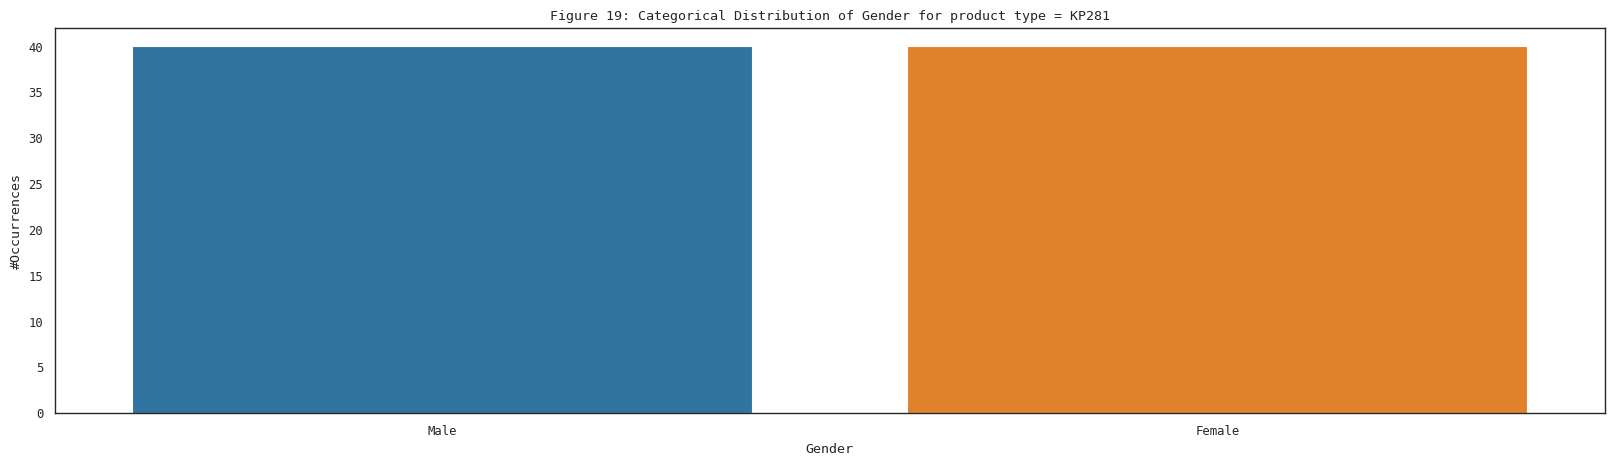

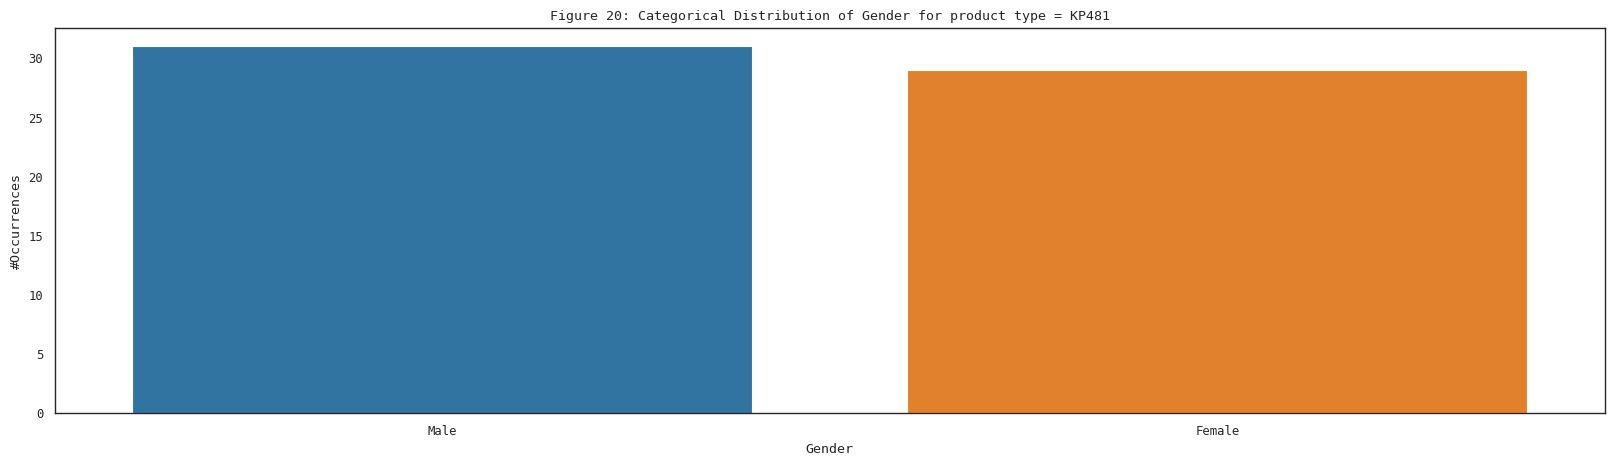

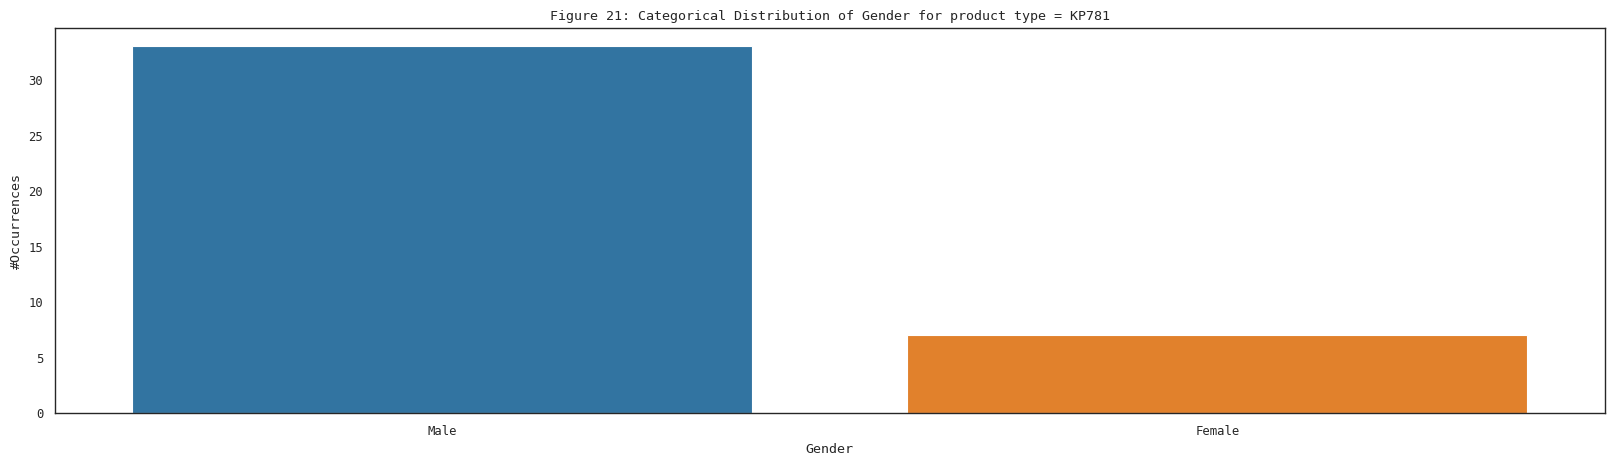

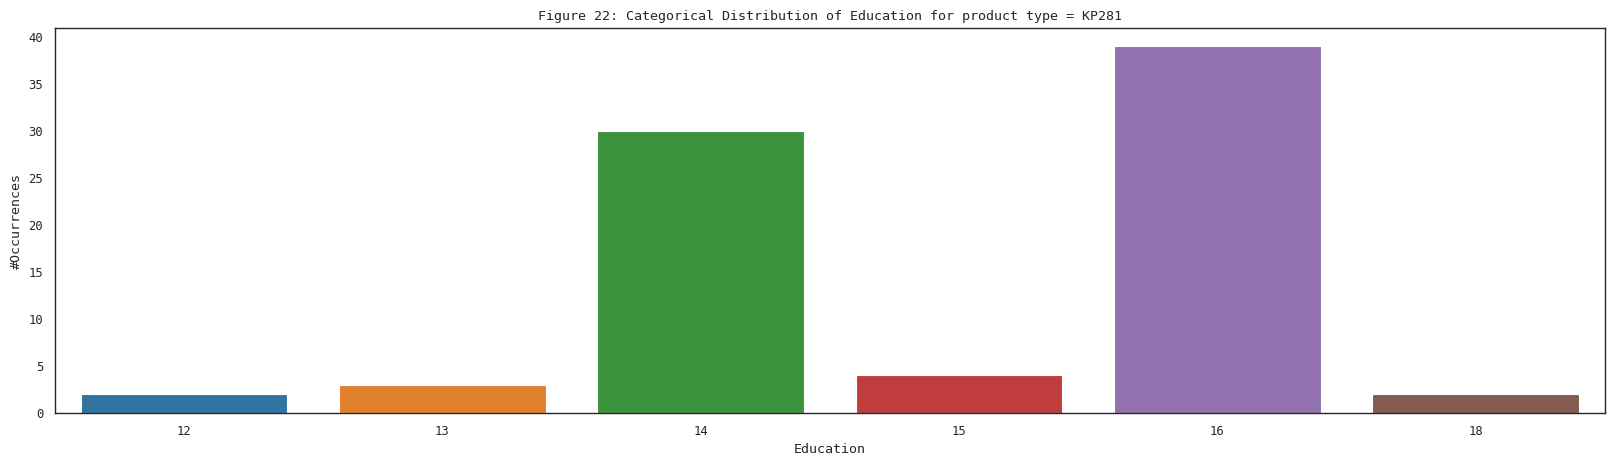

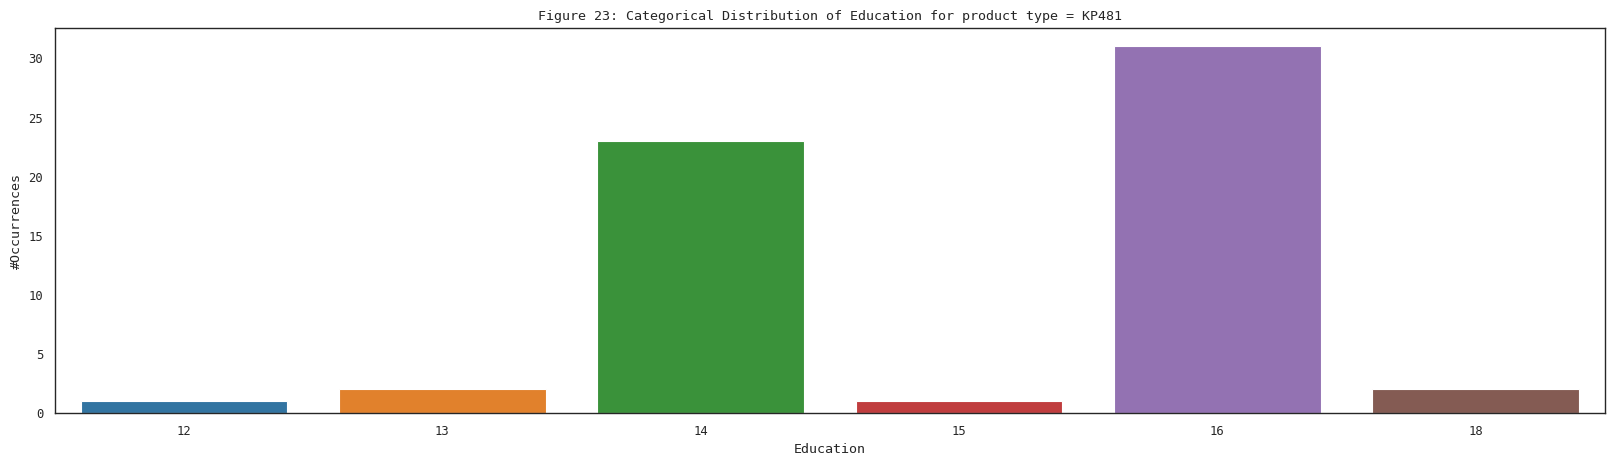

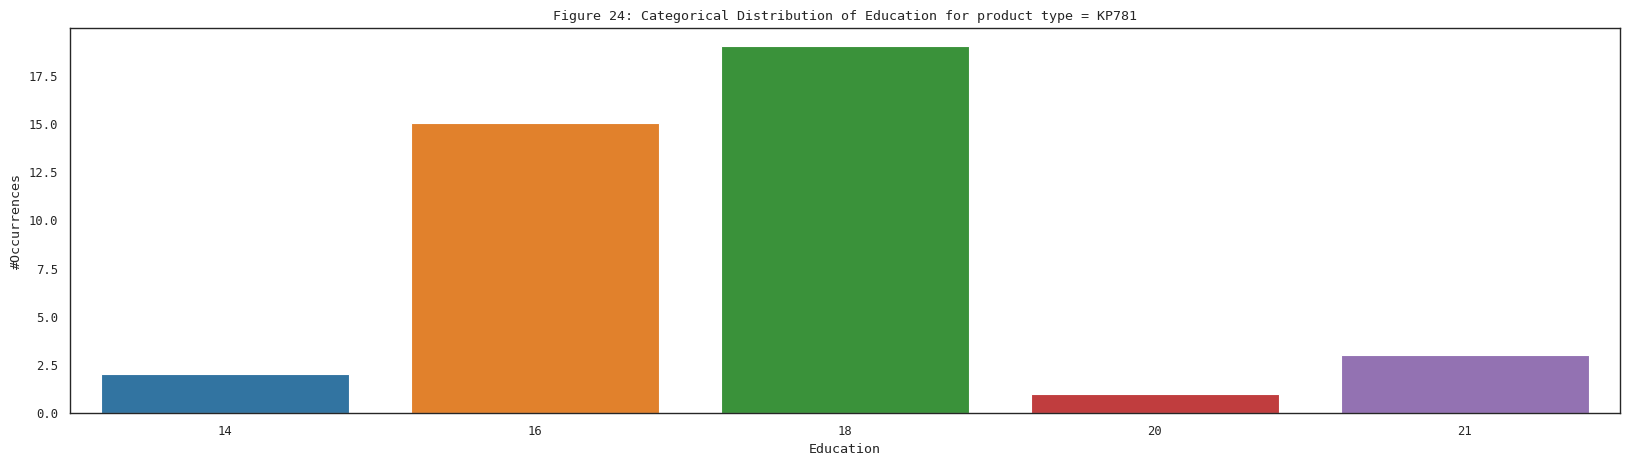

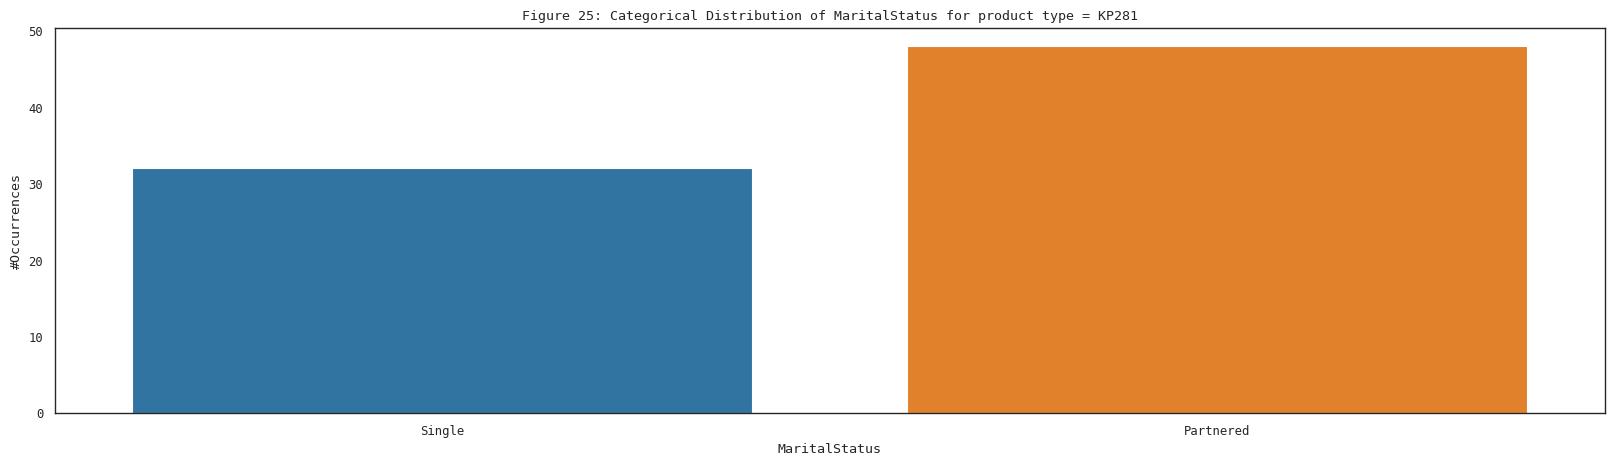

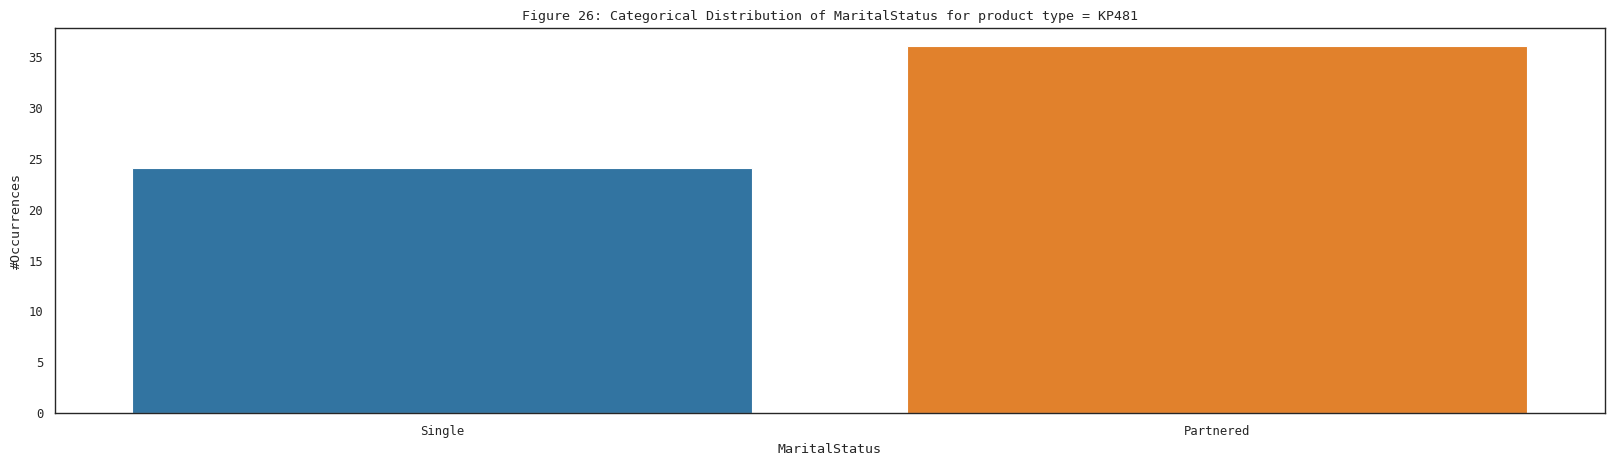

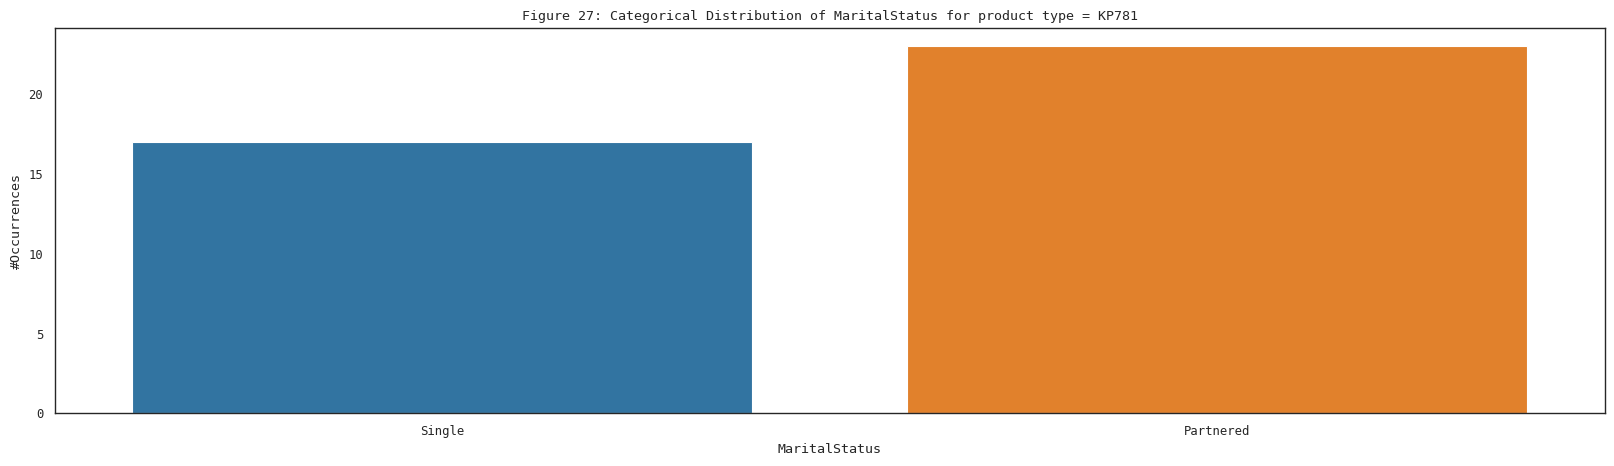

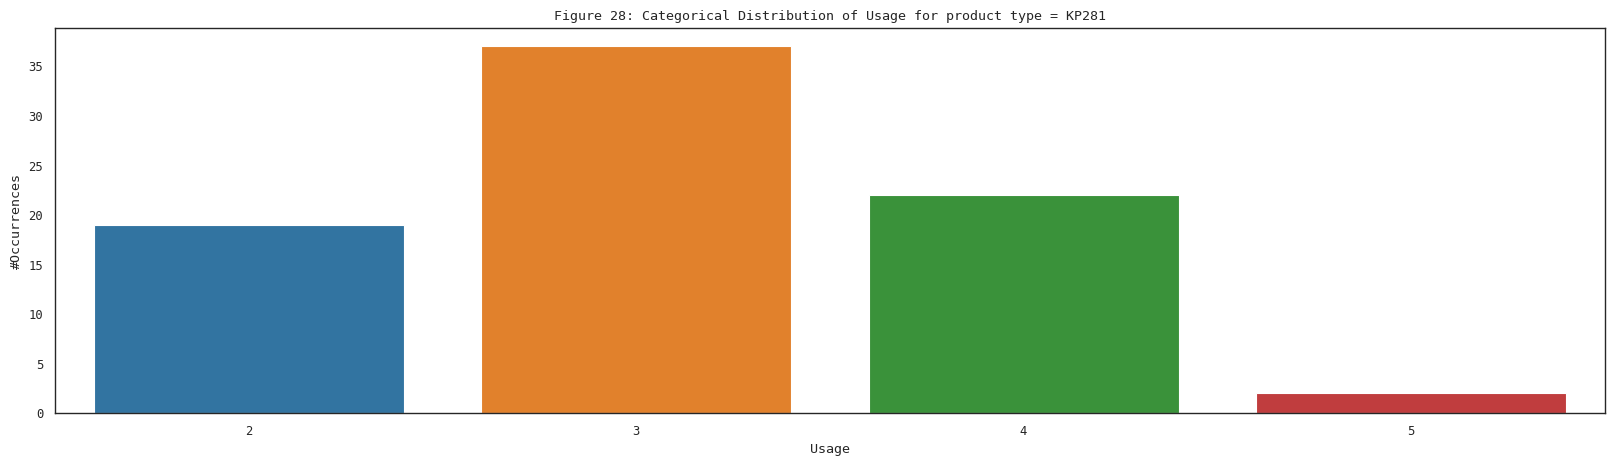

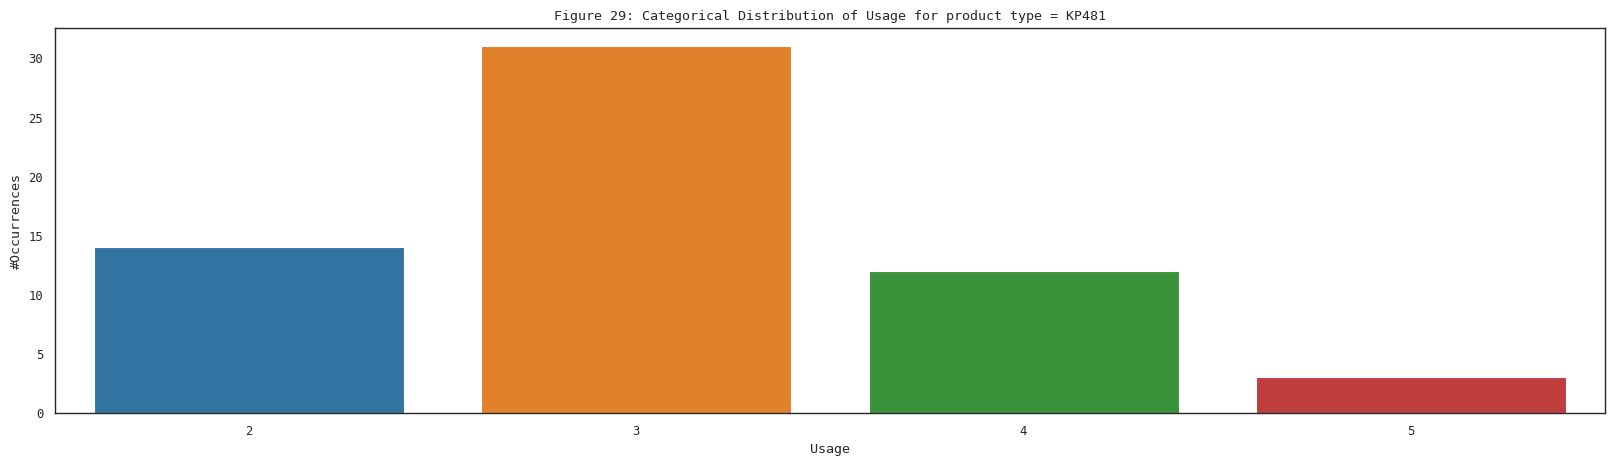

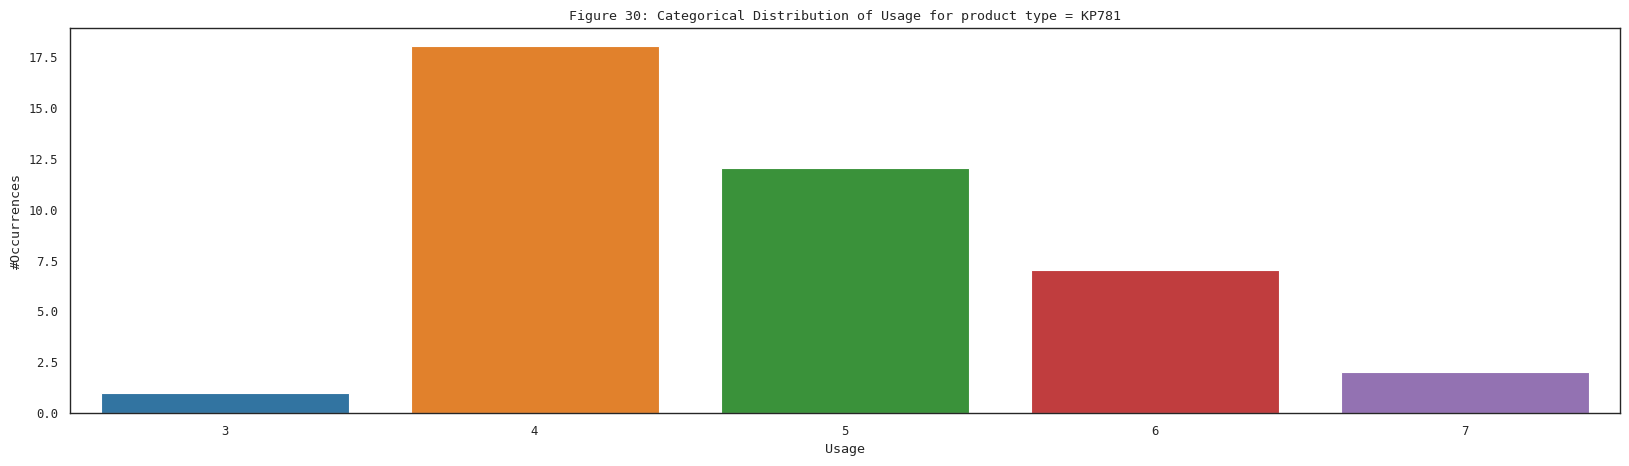

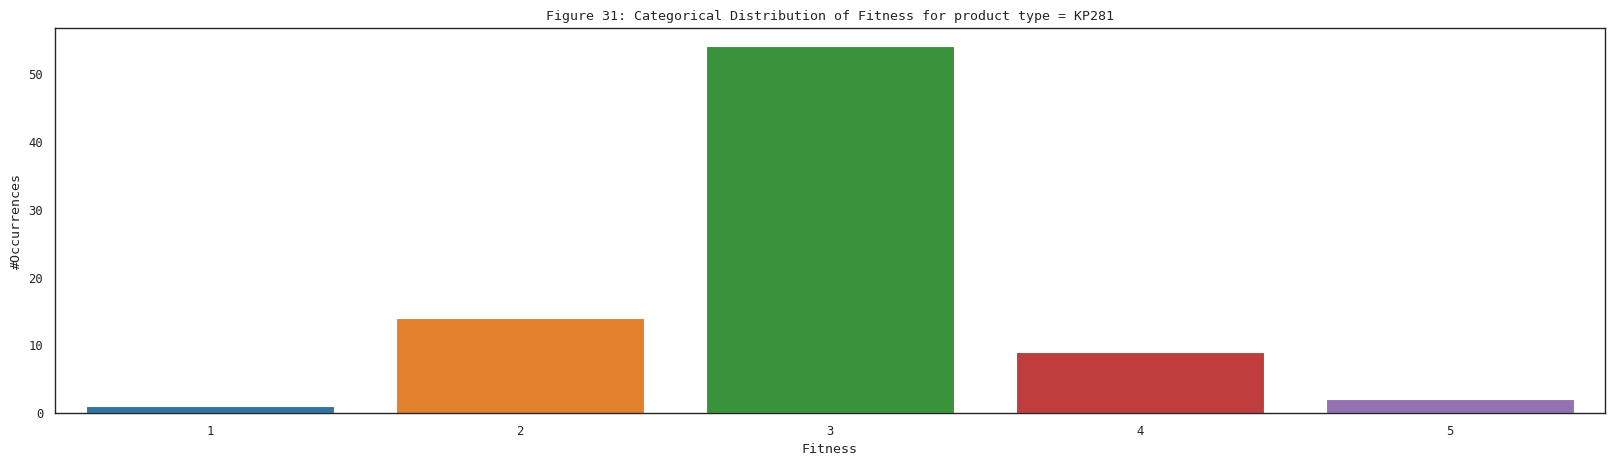

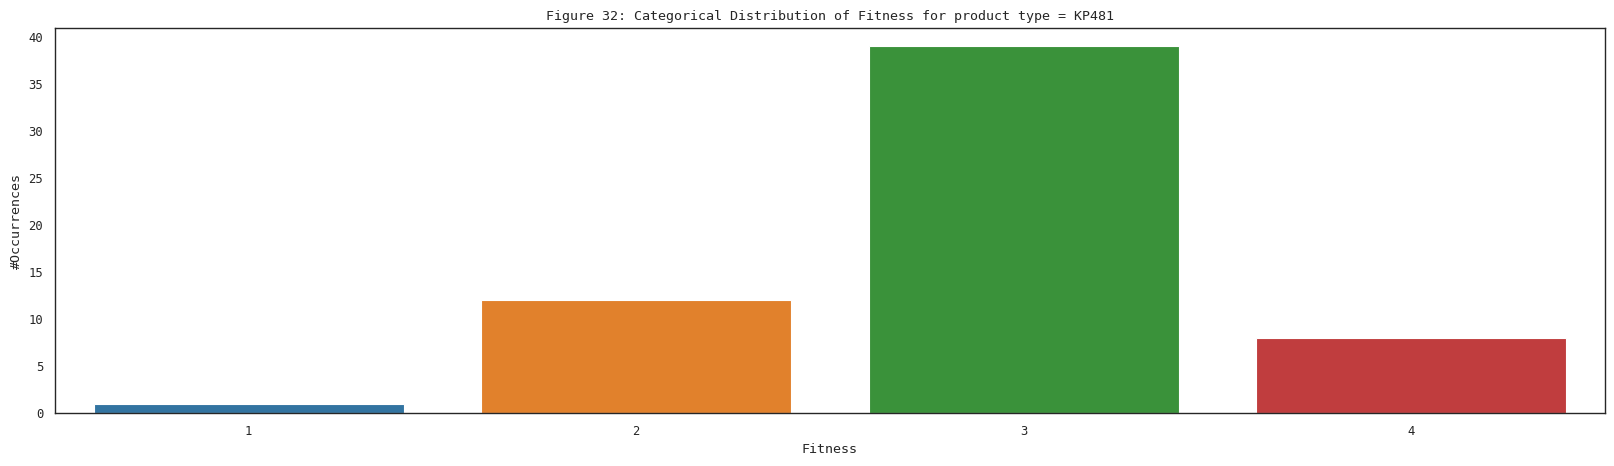

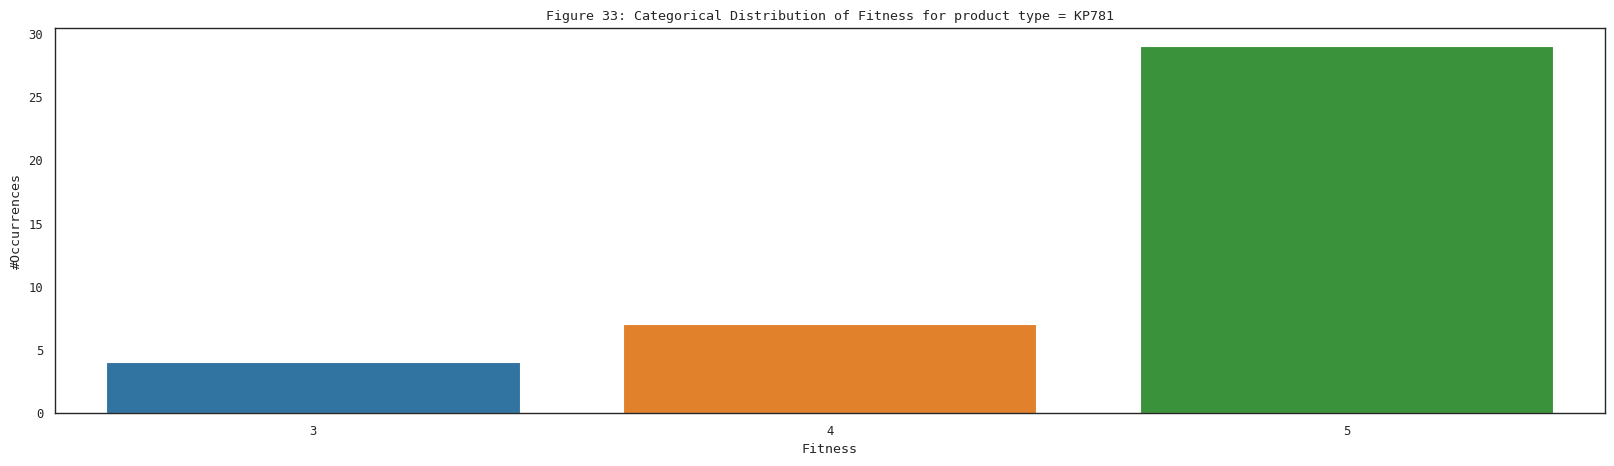

In [18]:
for col in object_col_list:

    fig_num += 1
    plot_countplot(df_kp281[col], col, fig_num, 'KP281')

    fig_num += 1
    plot_countplot(df_kp481[col], col, fig_num, 'KP481')

    fig_num += 1
    plot_countplot(df_kp781[col], col, fig_num, 'KP781')

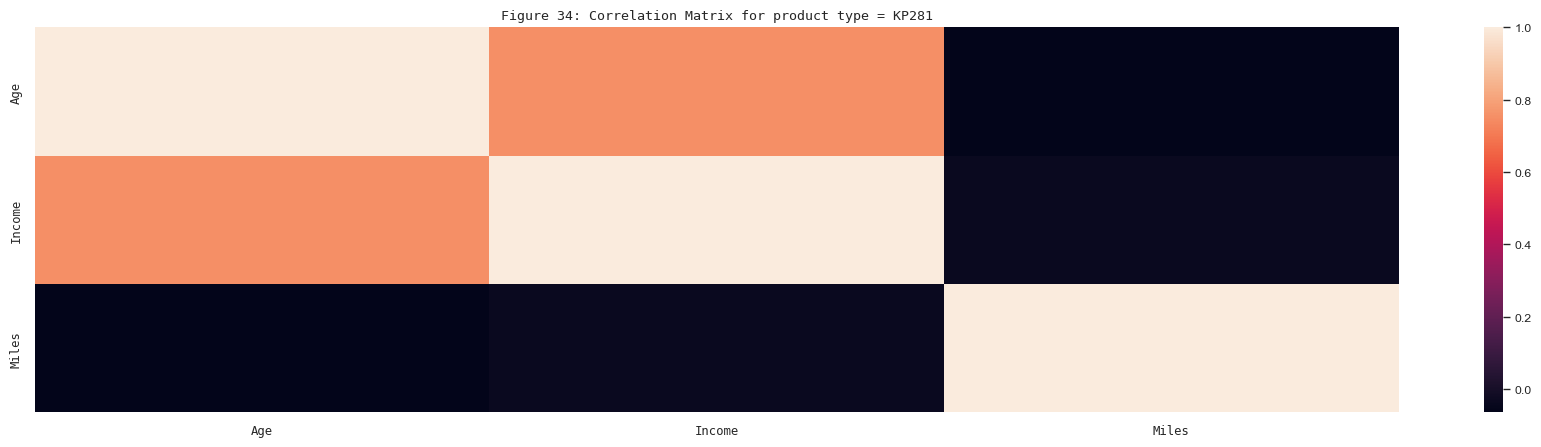

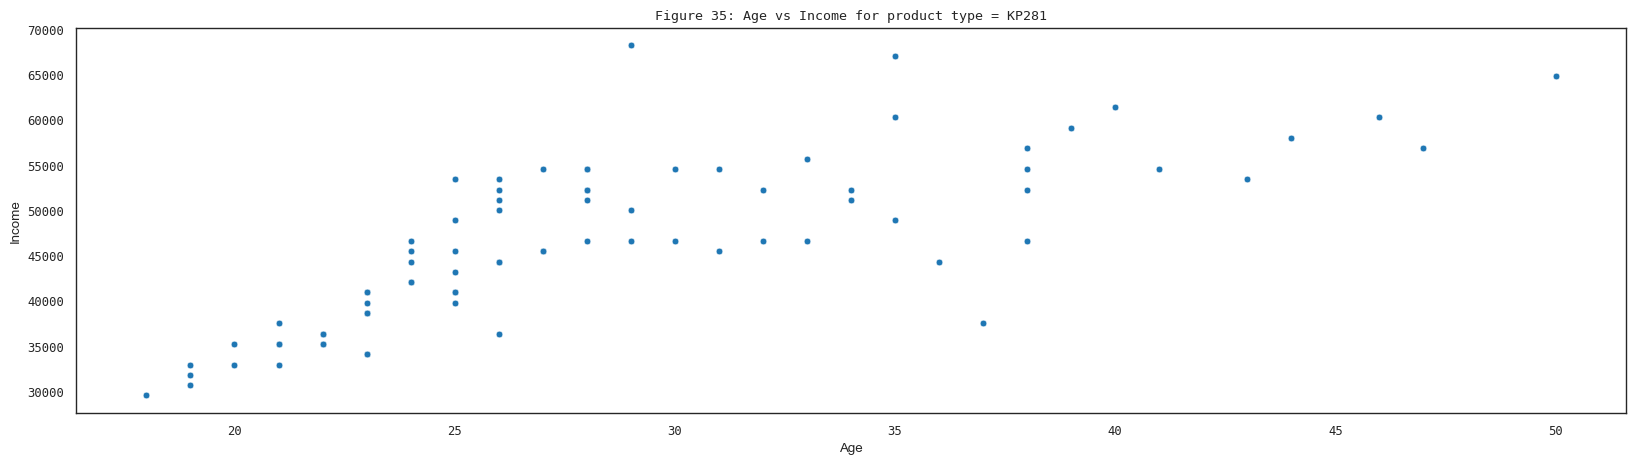

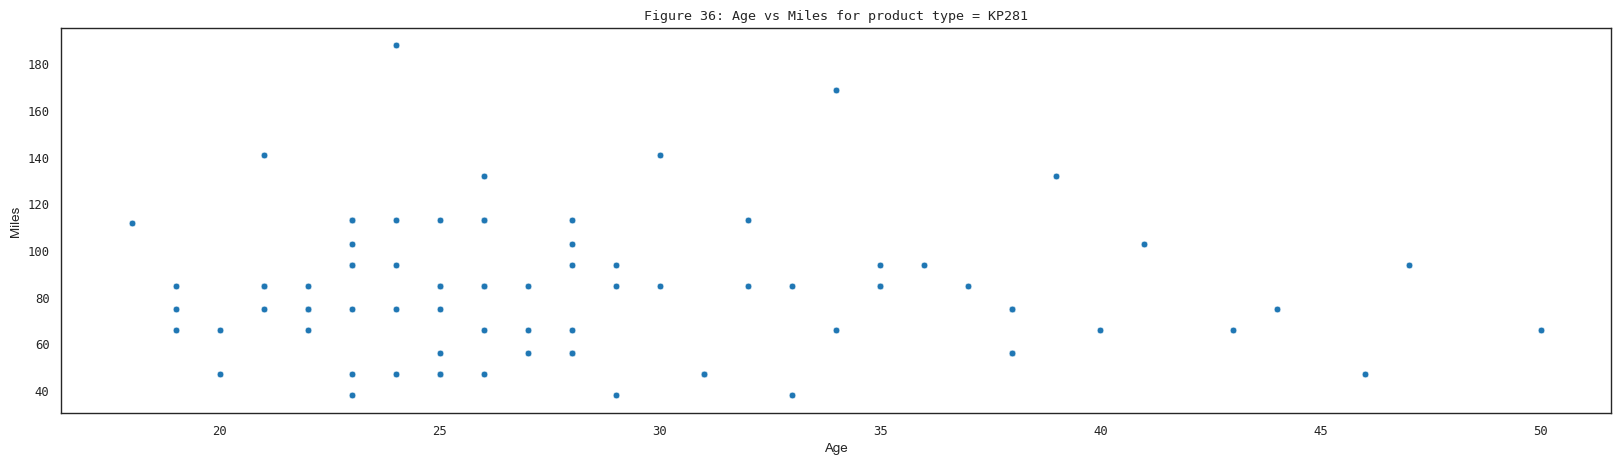

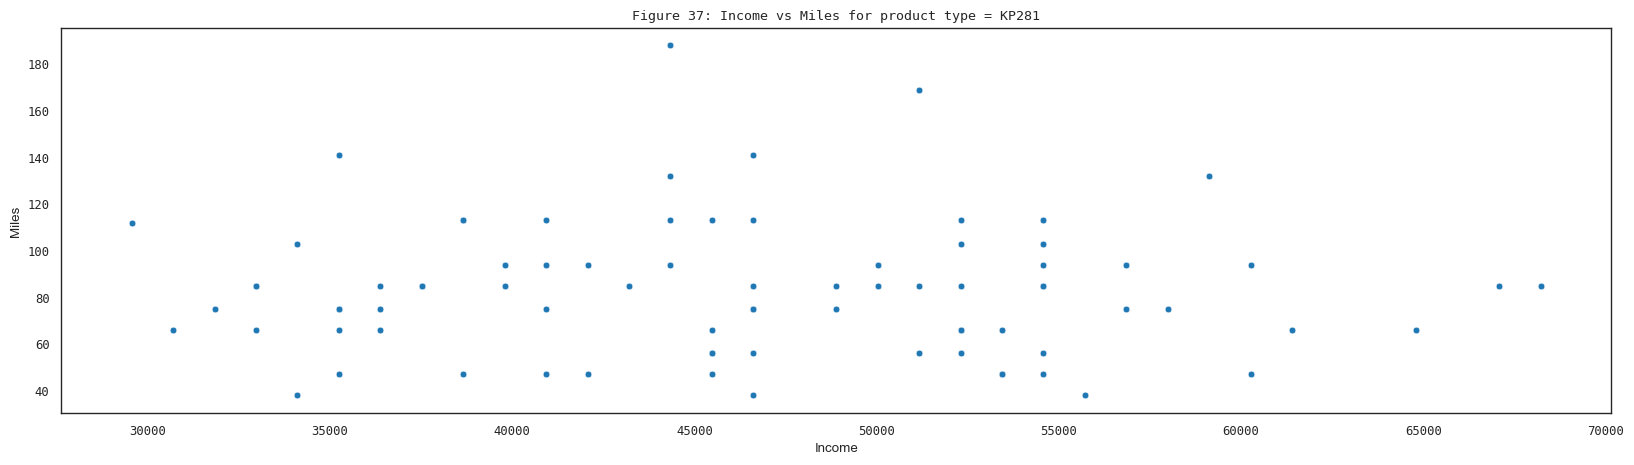

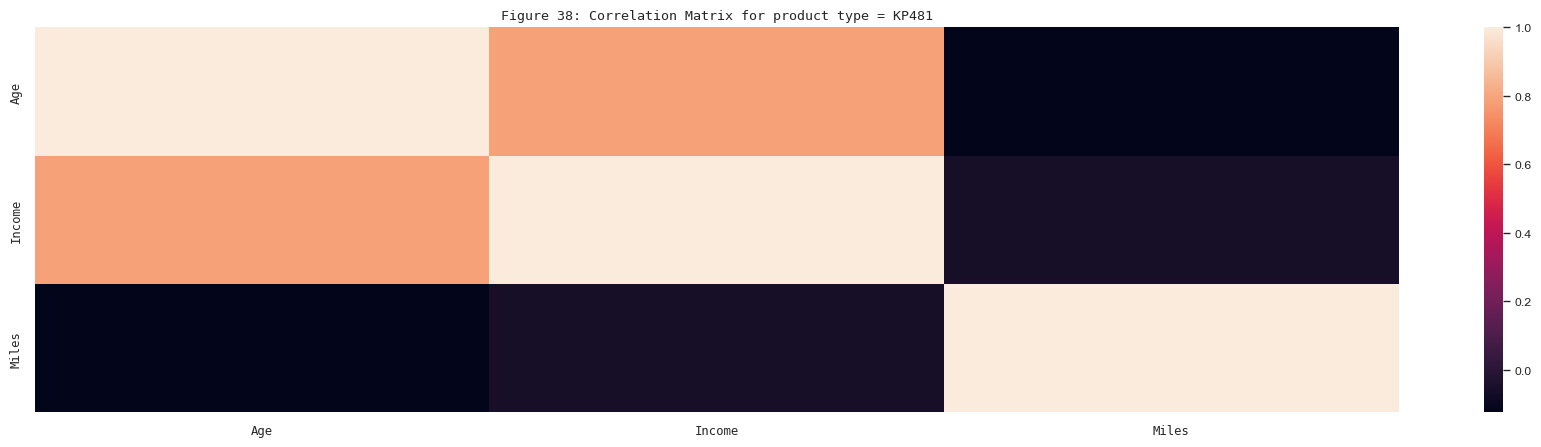

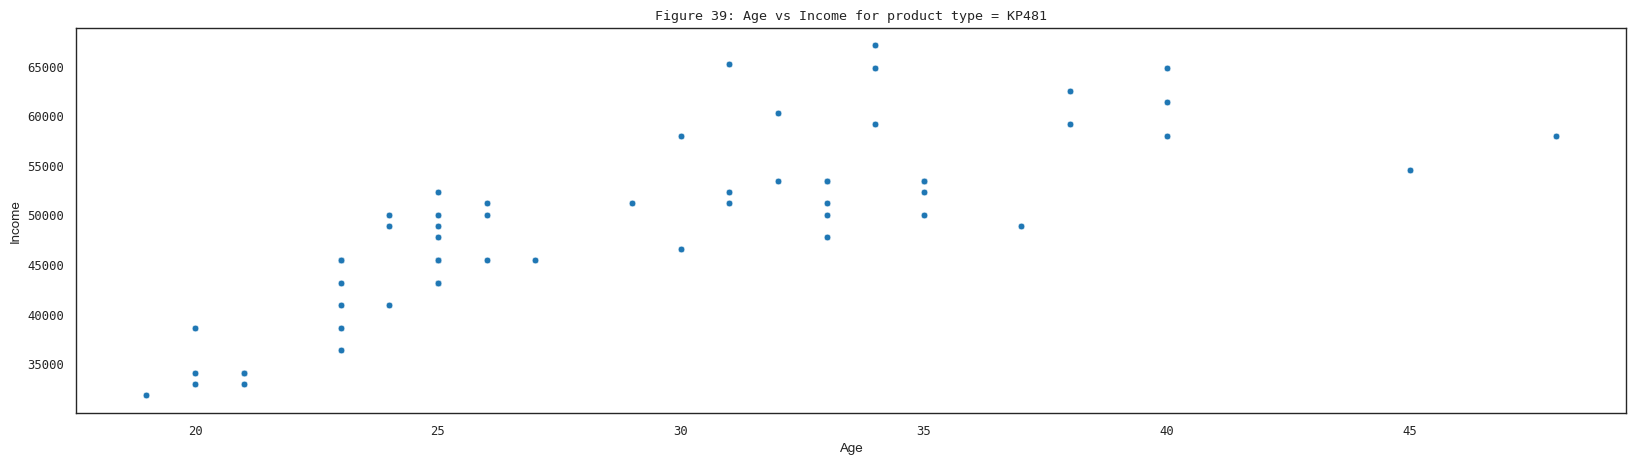

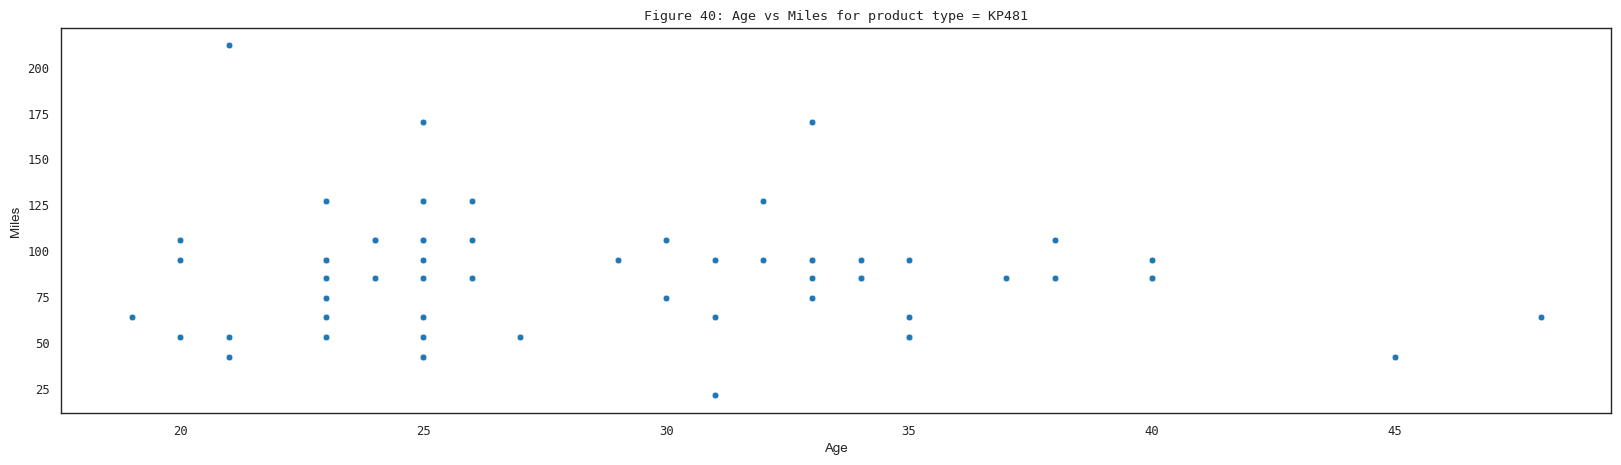

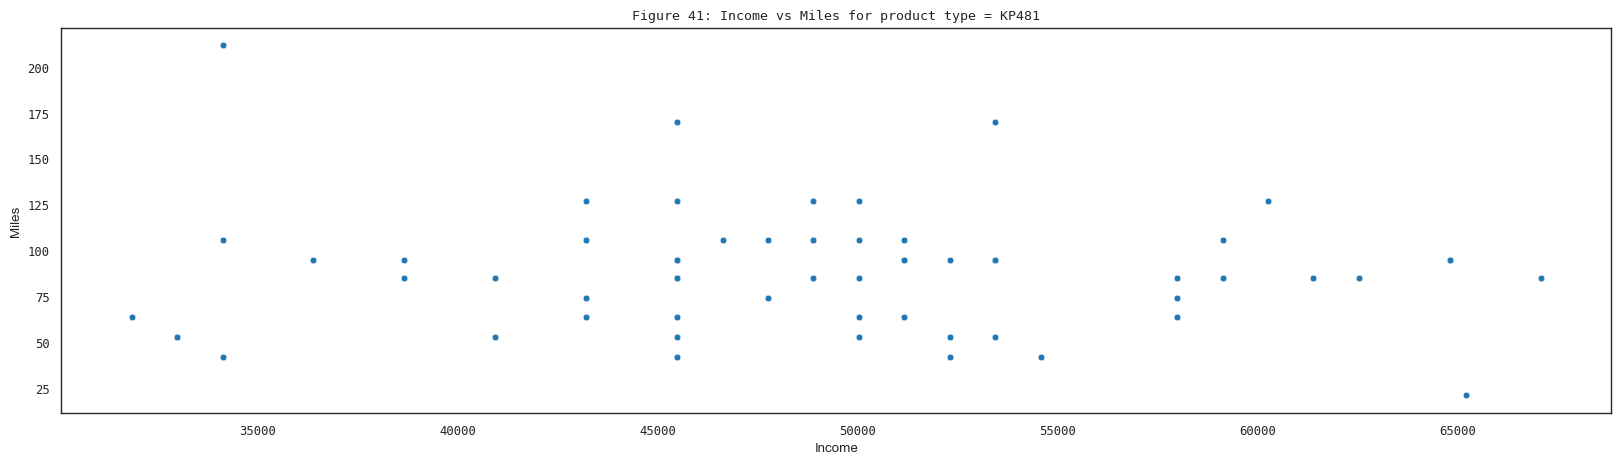

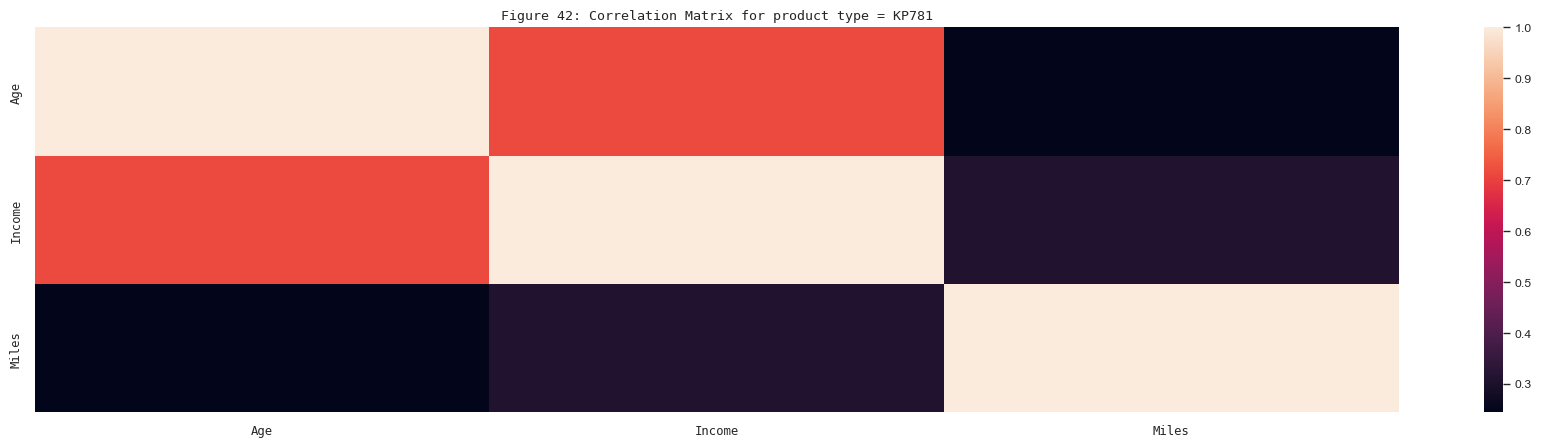

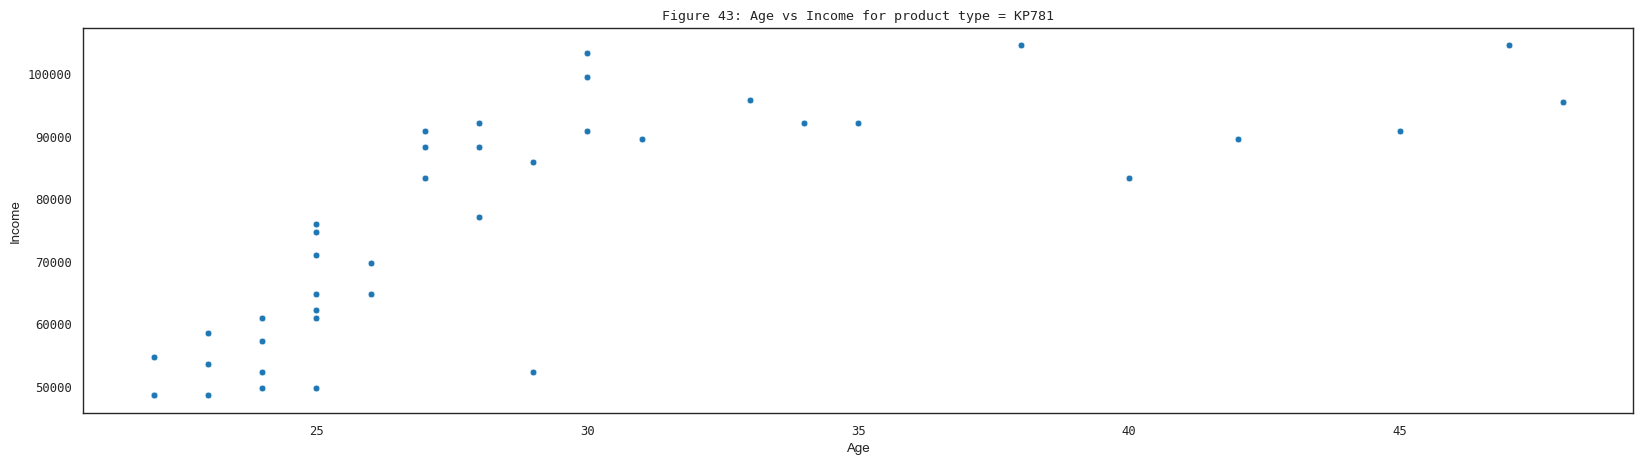

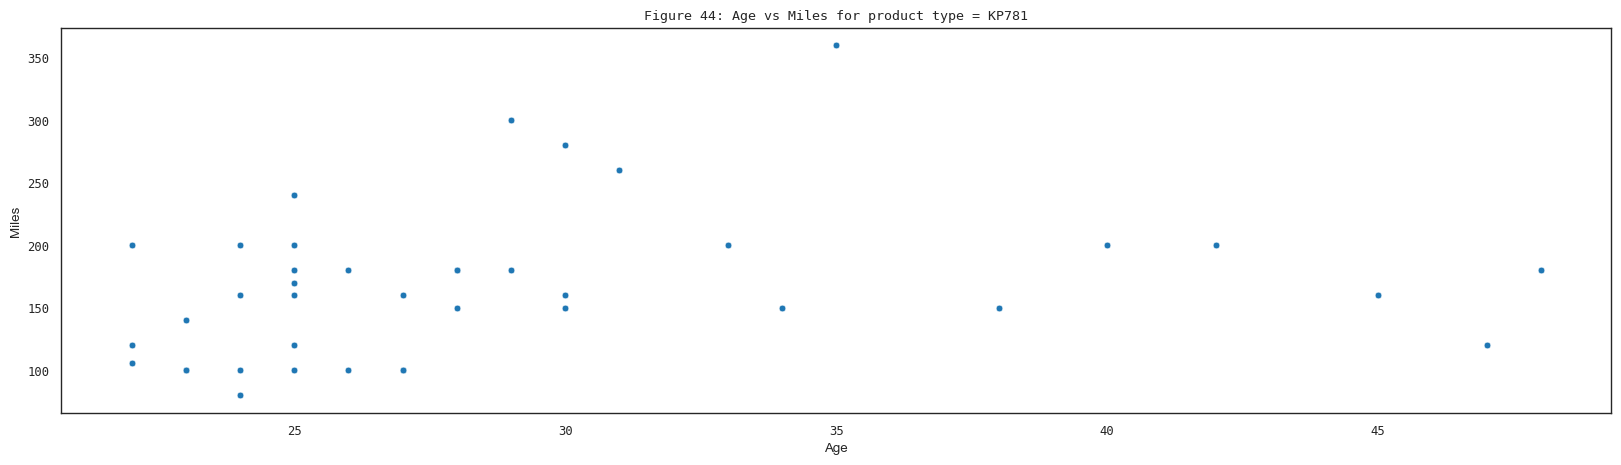

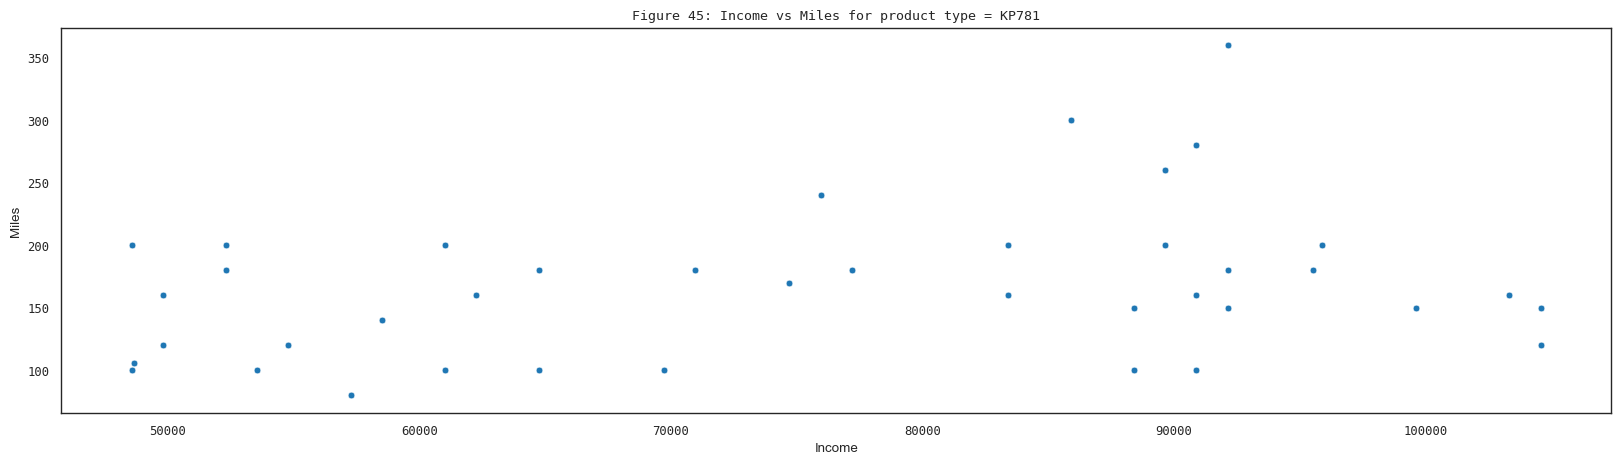

In [19]:
fig_num += 1
print_heatmap(df_kp281.corr(numeric_only=True), fig_num, 'KP281')
# plotting scatter to visualize the correlation depicted by the heatmap
int_col_list = [col for col in df_kp281.select_dtypes(int)]
for i in range(len(int_col_list)):
    for j in range(i + 1, len(int_col_list)):
        fig_num += 1
        plot_scatterplot(df_kp281[int_col_list[i]], df_kp281[int_col_list[j]], fig_num, int_col_list[i], int_col_list[j], 'KP281')

fig_num += 1
print_heatmap(df_kp481.corr(numeric_only=True), fig_num, 'KP481')
# plotting scatter to visualize the correlation depicted by the heatmap
int_col_list = [col for col in df_kp481.select_dtypes(int)]
for i in range(len(int_col_list)):
    for j in range(i + 1, len(int_col_list)):
        fig_num += 1
        plot_scatterplot(df_kp481[int_col_list[i]], df_kp481[int_col_list[j]], fig_num, int_col_list[i], int_col_list[j], 'KP481')

fig_num += 1
print_heatmap(df_kp781.corr(numeric_only=True), fig_num, 'KP781')
# plotting scatter to visualize the correlation depicted by the heatmap
int_col_list = [col for col in df_kp781.select_dtypes(int)]
for i in range(len(int_col_list)):
    for j in range(i + 1, len(int_col_list)):
        fig_num += 1
        plot_scatterplot(df_kp781[int_col_list[i]], df_kp781[int_col_list[j]], fig_num, int_col_list[i], int_col_list[j], 'KP781')

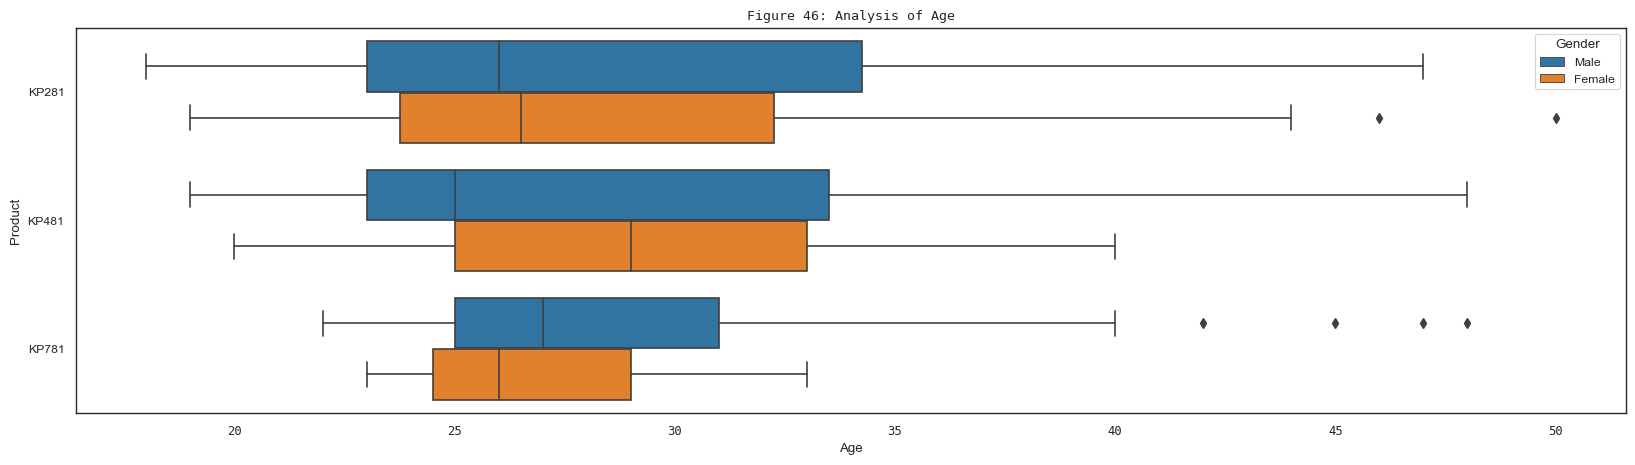

Median value of  Age  for  Male  for  KP281 : 26.0
Median value of  Age  for  Female  for  KP281 : 26.5

Median value of  Age  for  Male  for  KP481 : 25.0
Median value of  Age  for  Female  for  KP481 : 29.0

Median value of  Age  for  Male  for  KP781 : 27.0
Median value of  Age  for  Female  for  KP781 : 26.0



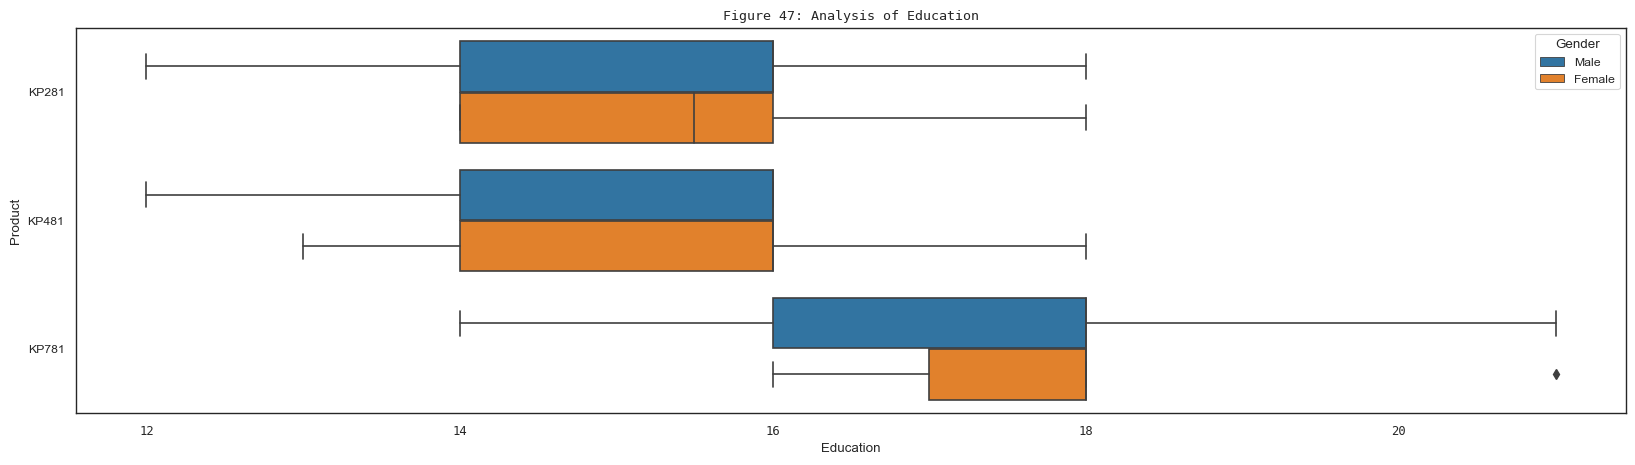

Median value of  Education  for  Male  for  KP281 : 16.0
Median value of  Education  for  Female  for  KP281 : 15.5

Median value of  Education  for  Male  for  KP481 : 16.0
Median value of  Education  for  Female  for  KP481 : 16.0

Median value of  Education  for  Male  for  KP781 : 18.0
Median value of  Education  for  Female  for  KP781 : 18.0



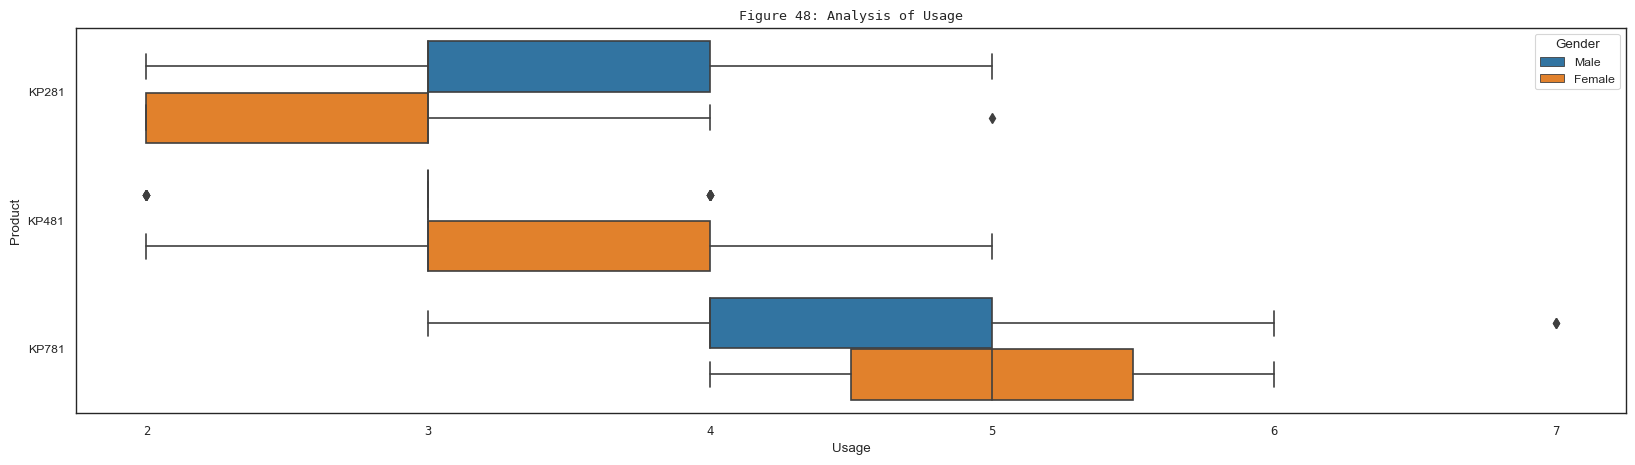

Median value of  Usage  for  Male  for  KP281 : 3.0
Median value of  Usage  for  Female  for  KP281 : 3.0

Median value of  Usage  for  Male  for  KP481 : 3.0
Median value of  Usage  for  Female  for  KP481 : 3.0

Median value of  Usage  for  Male  for  KP781 : 4.0
Median value of  Usage  for  Female  for  KP781 : 5.0



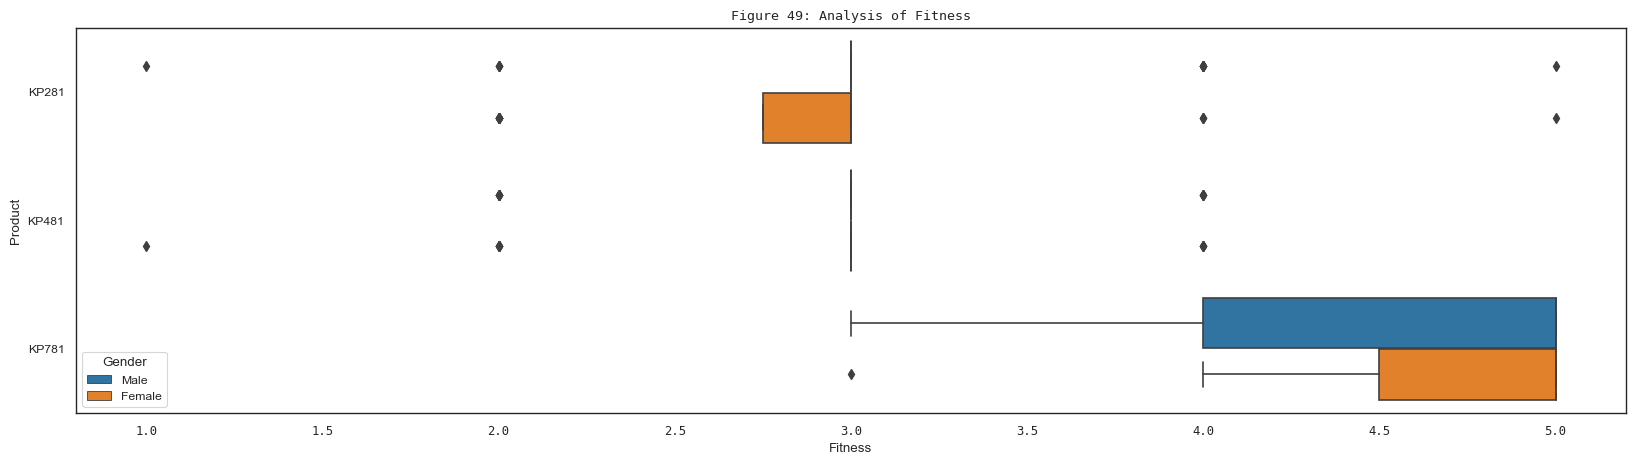

Median value of  Fitness  for  Male  for  KP281 : 3.0
Median value of  Fitness  for  Female  for  KP281 : 3.0

Median value of  Fitness  for  Male  for  KP481 : 3.0
Median value of  Fitness  for  Female  for  KP481 : 3.0

Median value of  Fitness  for  Male  for  KP781 : 5.0
Median value of  Fitness  for  Female  for  KP781 : 5.0



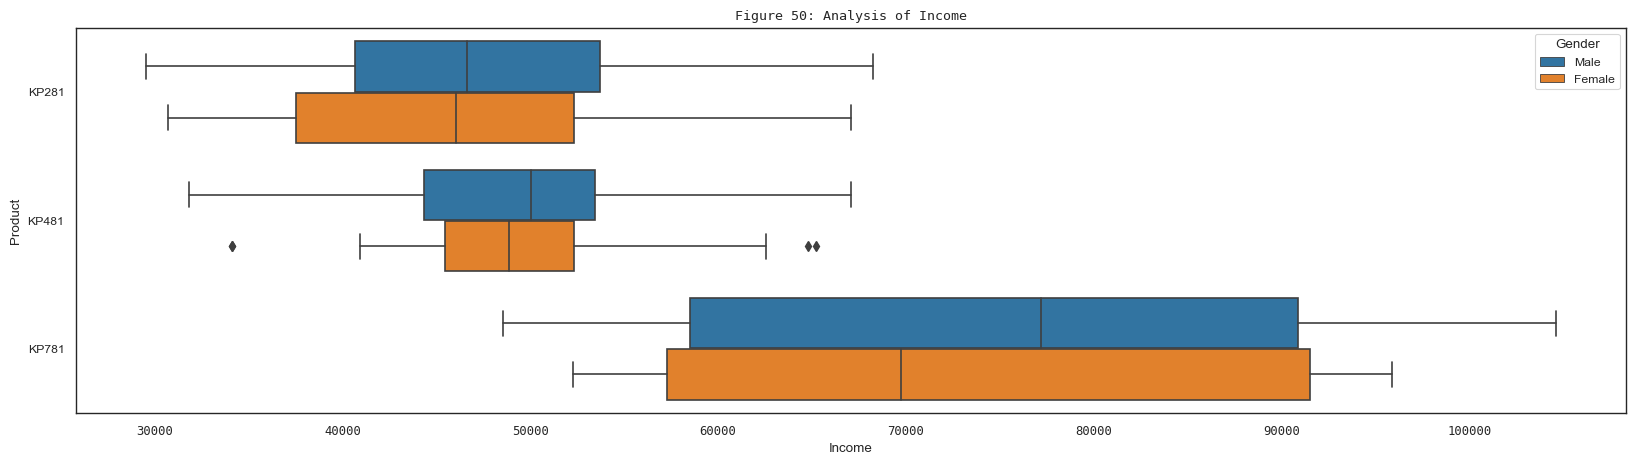

Median value of  Income  for  Male  for  KP281 : 46617.0
Median value of  Income  for  Female  for  KP281 : 46048.5

Median value of  Income  for  Male  for  KP481 : 50028.0
Median value of  Income  for  Female  for  KP481 : 48891.0

Median value of  Income  for  Male  for  KP781 : 77191.0
Median value of  Income  for  Female  for  KP781 : 69721.0



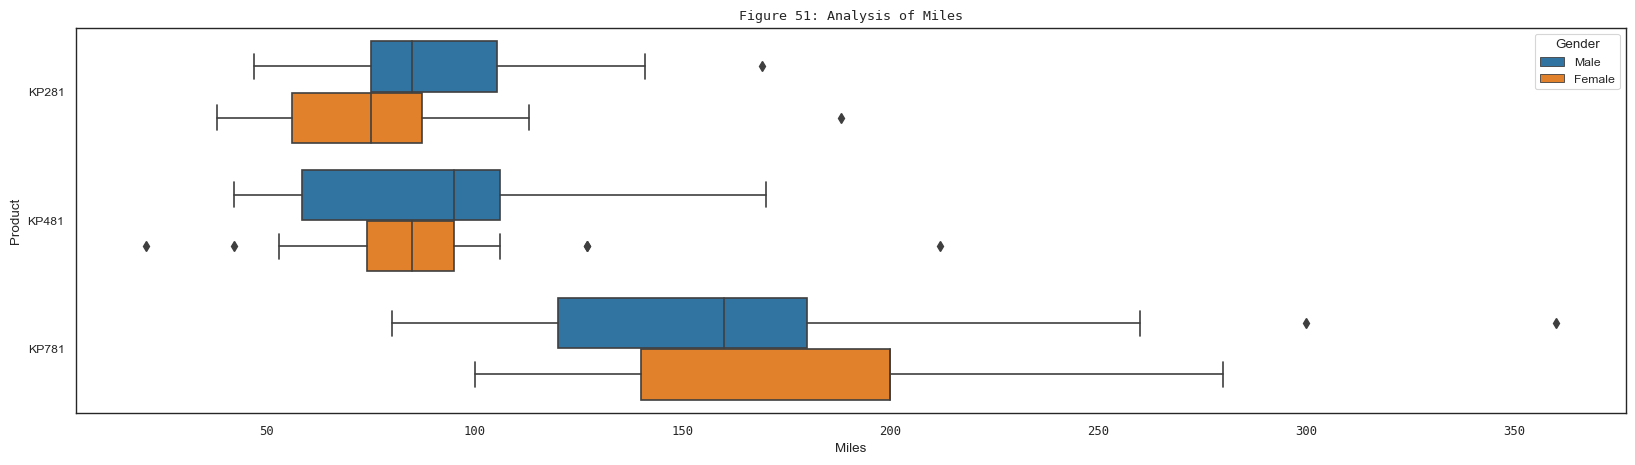

Median value of  Miles  for  Male  for  KP281 : 85.0
Median value of  Miles  for  Female  for  KP281 : 75.0

Median value of  Miles  for  Male  for  KP481 : 95.0
Median value of  Miles  for  Female  for  KP481 : 85.0

Median value of  Miles  for  Male  for  KP781 : 160.0
Median value of  Miles  for  Female  for  KP781 : 200.0



In [20]:
def plot_boxplot1(df, col, fig_num):
    plt.figure(figsize=(20, 5))
    sns.despine()
    sns.set_style('white')
    sns.set_context("paper")
    sns.boxplot(data=df, x=col, y='Product', hue='Gender', orient='h')
    plt.title(f"Figure {fig_num}: Analysis of {col}", **fig_dict)
    plt.xticks(**fig_dict)
    plt.show()

    for prod in ['KP281', 'KP481', 'KP781']:
        for gender in ['Male', 'Female']:
            print('Median value of ', col, ' for ', gender, ' for ', prod, ':', df[(df['Product'] == prod) & (df['Gender'] == gender)][col].median())
        print()


for col in   ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']:
    fig_num += 1
    plot_boxplot1(df, col, fig_num)

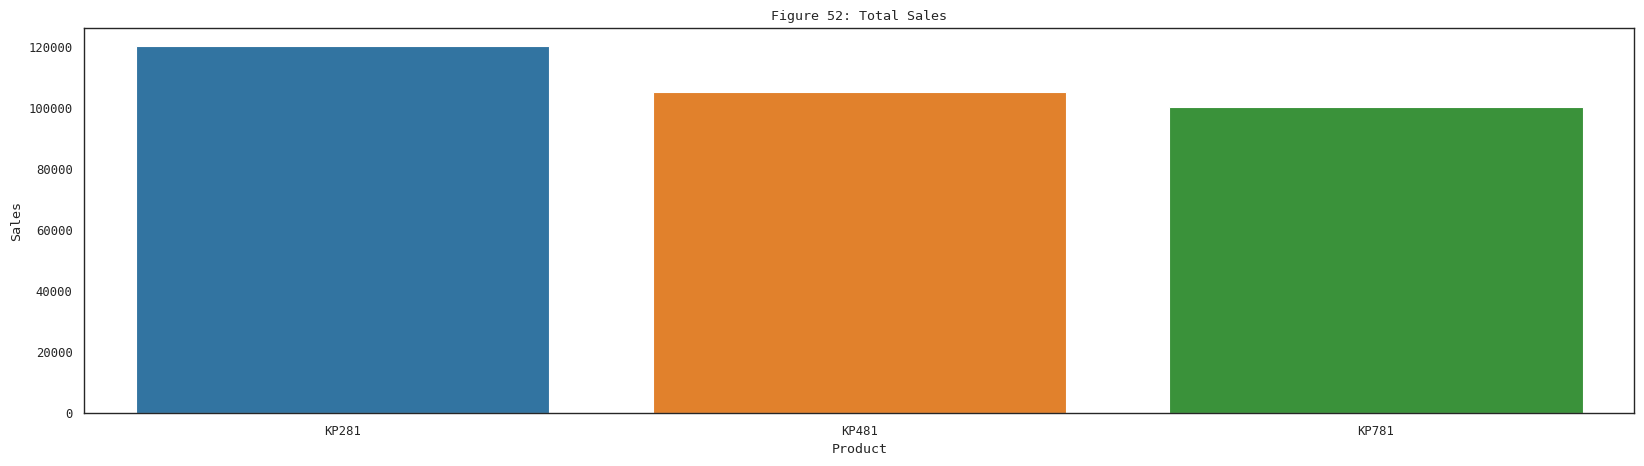

In [21]:
temp = df.groupby(by='Product', as_index=False).agg({'Gender':'count'}).rename(columns={'Gender':'Count'})
temp['Price per Unit'] = [1500, 1750, 2500]
temp['Total Sales'] = temp['Price per Unit'] * temp['Count']

def plot_barplot(data, fig_num):
    plt.figure(figsize=(20, 5))
    sns.despine()
    sns.set_style('white')
    sns.set_context("paper")
    sns.barplot(data=data, x='Product', y='Total Sales')
    plt.title(f"Figure {fig_num}: Total Sales", **fig_dict)
    plt.xticks(**fig_dict)
    plt.xlabel('Product', **fig_dict)
    plt.yticks(**fig_dict)
    plt.ylabel('Sales', **fig_dict)
    plt.show()

fig_num += 1
plot_barplot(temp, fig_num)

<span style="font-family: monospace">

<H2>Customer Profiling</H2>

Based on all the above plots from Figure 1 through 52, following can be devised about a TYPICAL customer profile for each of the three product types -

| Feature Type     | Product KP281 | Product KP481 | Product KP781 |
|------------------|---------------|---------------|---------------|
|Age               |23 - 33        |20 - 35        |20 - 30        |
|Income            |38k - 53k      |45k - 53k      |60k+           |
|Miles             |Upto 80        |100 - 125      |100 - 200      |
|Gender Preference |Both           |Both           |Males          |
|Education         |14 or 16 years |14 or 16 years |16 - 18 years  |
|Usage             |2 - 4 days     |2-4 days       |4+ days        |
|Fitness           |3              |3              |5              |



<H3>Some other Inferences</H3>

- For all the three product types, there are more customers 'Partnered' customers than 'Single'
- Sales Quantity and Amount - KP781 < KP481 < KP281
- High correlation between age and income
</span>

<span style="font-family: monospace">
<H2>Probabilities</H2>

Let's take a look at probailities now!
</span>

In [22]:
temp = df.groupby(by='Product', as_index=False).agg({'Gender':'count'}).rename(columns={'Gender':'Count'})
temp['Probability of purchase'] = round(temp['Count'] / df.shape[0], 2)
print(temp)

  Product  Count  Probability of purchase
0   KP281     80                     0.44
1   KP481     60                     0.33
2   KP781     40                     0.22


<span style="font-family: monospace">

- Probability of purchase of KP281 = 0.44
- Probability of purchase of KP481 = 0.33
- Probability of purchase of KP781 = 0.22

</span>

In [23]:
temp = df.groupby(by='Product', as_index=False).agg({'Gender':'count'}).rename(columns={'Gender':'Count'})
temp['Probability of purchase'] = round(temp['Count'] / df.shape[0], 2)
temp['Price per Unit'] = [1500, 1750, 2500]
temp['Expected Revenue'] = temp['Probability of purchase'] * temp['Price per Unit']
print(temp)
print()
print('Expected Revenue: $', temp['Expected Revenue'].sum())

  Product  Count  Probability of purchase  Price per Unit  Expected Revenue
0   KP281     80                     0.44            1500             660.0
1   KP481     60                     0.33            1750             577.5
2   KP781     40                     0.22            2500             550.0

Expected Revenue: $ 1787.5


In [24]:
temp = pd.crosstab(index=df["Product"], columns=df["Gender"], margins=True)
temp['Female purchase probability'] = round(temp['Female'] / temp['All'], 2)
temp['Male purchase probability'] = round(temp['Male'] / temp['All'], 2)
print(temp)

Gender   Female  Male  All  Female purchase probability  Male purchase probability
Product                                                                           
KP281        40    40   80                         0.50                       0.50
KP481        29    31   60                         0.48                       0.52
KP781         7    33   40                         0.18                       0.82
All          76   104  180                         0.42                       0.58


<span style="font-family: monospace">

Given a purchase is made
- Probability of purchase by a Female = 0.42
- Probability of purchase by a Male = 0.58

Given the purchase is made for KP281
- Probability of purchase by a Female = 0.50
- Probability of purchase by a Male = 0.50

Given the purchase is made for KP481
- Probability of purchase by a Female = 0.48
- Probability of purchase by a Male = 0.52

Given the purchase is made for KP781
- Probability of purchase by a Female = 0.18
- Probability of purchase by a Male = 0.82

</span>

In [25]:
temp = pd.crosstab(index=df["Product"], columns=df["MaritalStatus"], margins=True)
temp['Single purchase probability'] = round(temp['Single'] / temp['All'], 2)
temp['Partnered purchase probability'] = round(temp['Partnered'] / temp['All'], 2)
print(temp)

MaritalStatus  Partnered  Single  All  Single purchase probability  Partnered purchase probability
Product                                                                                           
KP281                 48      32   80                         0.40                            0.60
KP481                 36      24   60                         0.40                            0.60
KP781                 23      17   40                         0.42                            0.57
All                  107      73  180                         0.41                            0.59


<span style="font-family: monospace">

Given a purchase is made
- Probability of purchase by a Single = 0.41
- Probability of purchase by a Partnered = 0.59

Given the purchase is made for KP281
- Probability of purchase by a Single = 0.40
- Probability of purchase by a Partnered = 0.60

Given the purchase is made for KP481
- Probability of purchase by a Single = 0.40
- Probability of purchase by a Partnered = 0.60

Given the purchase is made for KP781
- Probability of purchase by a Single = 0.425
- Probability of purchase by a Partnered = 0.575

</span>

In [26]:
temp = df[(df['Miles'] > 75) & (df['Miles'] < 125)]['Product'].value_counts().reset_index()
temp = temp.rename(columns={'index': 'Product', 'Product': 'Count'})
temp['Purchase probability'] = round(temp['Count'] / temp['Count'].sum(), 2)
print(temp)

  Product  Count  Purchase probability
0   KP281     36                  0.46
1   KP481     31                  0.39
2   KP781     12                  0.15


<span style="font-family: monospace">

Given a purchase is made by a person walking between 75 and 125 miles on an average per week
- Probability of purchase of KP281 = 0.46
- Probability of purchase of KP481 = 0.39
- Probability of purchase of KP781 = 0.15

</span>

In [27]:
temp = df[(df['Fitness'] < 4) & (df['Usage'] > 3) & (df['Income'] > 40000) & (df['Income'] < 55000)]
temp = pd.crosstab(index=temp["Product"], columns=temp["Gender"], margins=True)
print(temp)

Gender   Female  Male  All
Product                   
KP281         4     7   11
KP481         4     5    9
KP781         0     1    1
All           8    13   21


<span style="font-family: monospace">

Recommend a treadmill to a `Woman` whose `Fitness` < 4, `Usage` > 3, and 40000 < `Income` < 55000
- Probability of purchase of both KP281 and KP481 for the given profile is same (4 women buying each of the product). But we can recommend KP281 because it has been purchased more collectively by men and women.

Recommend a treadmill to a `Man` whose `Fitness` < 4, `Usage` > 3, and 40000 < `Income` < 55000
- We can recommend KP281 because the probability of purchase of KP281 is slightly than that of KP481 for the given profile.

</span>

In [28]:
temp = df[(df['Education'] < 20) & (df['Age'] > 40)]
temp = pd.crosstab(index=temp["Product"], columns=temp["Gender"], margins=True)
print(temp)

Gender   Female  Male  All
Product                   
KP281         3     3    6
KP481         0     2    2
KP781         0     4    4
All           3     9   12


<span style="font-family: monospace">

Recommend a treadmill to a `Woman` whose `Education` < 20 and `Age` > 40
- We can recommend KP281 because these are the only tradmills bought by customers in the profile.

Recommend a treadmill to a `Man` whose `Education` < 20 and `Age` > 40
- We can recommend KP781 because of the highest probability of purchase.
</span>

<span style="font-family: monospace">

<H2>Business Recommendations</H2>

- While KP281 and KP481 both enjoys approximately equal customer base of males and females, KP781 has significantly less female customer. An R&D can be conducted to understand the reasoning and close this gap. Same thing can be done for 37+ years of age customers who prefers KP281 or KP481.
- We can observe a huge gap between the prices of KP481 and KP781 and can take this opportunity to introduce 2 mid-range treadmills, say KP581 for 2000 dollars and KP681 for 2250 dollars. These new products can help increase the revenue by attracting customers of KP481 to spend a little more and get a higher quality product. KP681, especially, can a good decoy model that can lure customers to KP781. KP581 and KP681 should be introduced for varied range of the following parameters:
    - Miles: Should be somewhat different from the current's product range of 100 - 125.
    - Fitness: Should be introduced for customers who regard themselves as moderately fit.
    - Usage: Should be suitable for typical usage of 3-5 days.
- We can introduce another new product, say KP181 for $1400, exlusively for younger customer base, less than 20 years of age, with sub-par features as compared to KP281 and a small size. This would be successfull product because of the issue of obesity in teenagers prevailing in the 21st century.
- We can run campaigns targetting people with `MaritalStatus = Single` and enlighten them with the benefits of exercising, especially Cardio and take the opportunity to show how Aerofit can help them in achieving greater fitness.
- We can partner with a fitness chain and start a dedicated fitness program for all our customers that can encourage more people purchasing the products and increase our revenue.
</span>